# Анализ клиентов банка и их сегментация по количеству продуктов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Наша задача:** проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

**Конечная цель исследования:** уменьшить отток клиентов на основе анализа их поведения.

# Декомпозиция

## Первичное ознакомление

а) общий обзор датафрейма (размер, содержание, типы данных);
<br>

б) проверка на дубликаты, пропуски, аномалии.

## Предобработка данных

а) приведение названий столбцов к единому стилю (при необходимости);
<br>

б) обработка пропусков (заполнение каким-либо значением, заглушками или оставить как есть), объяснение их возникновения;
<br>

в) обработка аномалий (объяснение их возникновения, если есть);
<br>

г) обработка дубликатов (удаление, если есть).


## Исследовательский анализ данных (EDA)

а) исследовать распределения по признакам среди клиентов;
<br>

б) поиск корреляции между признаками.

## Сегментация данных (выделение сегментов)

а) сегментировать клиентов обладающих схожими характеристиками;
<br>

б) исследовать распределения по признакам среди клиентов в разрезе оттока.

## Статистическое исследование данных (Проверка гипотез)

**Представим две гипотезы:**

- *проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним*
<br>

- *проверка гипотезы различия дохода между клиентами, у кого присутствует кредитная карта и теми, у кого кредитной карты нет (возможно гипотеза поменяется в ходе исследования)*

а) разделение данных на группы согласно гипотезе;
<br>

б) подготовка данных к проведению теста (проверяем наличие выбросов);
<br>

в) определение метода тестирования;
<br>

г) проведение тестирования и интерпретация результатов.

## Выводы и рекомендации по удержанию сегментов

а) оставить рекомендации менеджеру, по удержанию клиентов оттока, на основе проведенного анализа;
<br>

б) для наглядности построить дашборд и сделать презентацию

# Выполнение проекта

## Обзор данных

Импортируем нужные библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

Сделаем более читаемый цифровой формат в таблицах:

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

Откроем файл с данными:

In [3]:
df = pd.read_csv('/datasets/bank_dataset.csv')

Описание данных: 

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

In [4]:
# создадим функцию для удобства просмотра общей информации
def df_info(df):    
    df.info()
    display(df.head())
    print('Количество дубликатов:', df.duplicated().sum())
    display('Процент пропусков', df.isna().mean()*100,
    df.describe().T)

Посмотрим общую информацию:

In [5]:
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


Количество дубликатов: 0


'Процент пропусков'

userid                             0.00
score                              0.00
City                               0.00
Gender                             0.00
Age                                0.00
Objects                            0.00
Balance                           36.17
Products                           0.00
CreditCard                         0.00
Loyalty                            0.00
estimated_salary                   0.00
Churn                              0.00
dtype: float64

,count,mean,std,min,25%,50%,75%,max
userid,"10,000.00","15,733,676.57","71,936.19","15,608,437.00","15,671,264.25","15,733,474.00","15,795,969.75","15,858,426.00"
score,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Objects,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"6,383.00","119,827.49","30,095.06","3,768.69","100,181.98","119,839.69","139,512.29","250,898.09"
Products,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
CreditCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
Loyalty,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
Churn,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


И сразу посмотрим на столбцы с качественными переменными (где это имеет смысл), чтобы понимать, что ничего лишнего в них нет:

In [6]:
# создадим список из нужных столбцов
cat_list = ['City', 'Gender', 'Loyalty', 'Churn', 'CreditCard']

# пройдемся циклом по данным столбцам
for x in cat_list:
    print(df[x].value_counts(normalize=True) * 100, 
                            '\n' + '---------' * 5)

Ярославль                       50.14
Ростов Великий                  25.09
Рыбинск                         24.77
Name: City, dtype: float64 
---------------------------------------------
М                  54.57
Ж                  45.43
Name: Gender, dtype: float64 
---------------------------------------------
1                  51.51
0                  48.49
Name: Loyalty, dtype: float64 
---------------------------------------------
0                  79.63
1                  20.37
Name: Churn, dtype: float64 
---------------------------------------------
1                  70.55
0                  29.45
Name: CreditCard, dtype: float64 
---------------------------------------------


Итак, что мы можем сказать, впервые взглянув на данные:

- наименования столбцов нужно привести к единому стилю;
<br>

- процент пропусков, в столбце баланса на счете, достаточно высокий (36,17%). Удалять такое количество строк нельзя, заполнять какими-либо значениями - некорректно. Надо рассмотреть эти пропуски в разрезе остальных признаков. Больше пропусков не наблюдаем;
<br>

- явных дубликатов в таблице нет;
<br>

- типы данных соответствуют столбцам. В теории, можно перевести зарплаты и балансы на счетах в `int`, но, с точки зрения анализа, нам это ничего не даст;
<br>

- на первый взгляд, каких-то аномалий большого масштаба не наблюдается. Есть подозрительно маленькое минимальное значение в оценочных зарплатах в 11.58 руб, но нужно рассмотреть подробнее, как много таких значений (вероятно очень мало, судя по среднему и медиане, и по процентилям) и из-за чего они могут присутствовать;
<br>

-  в столбцах с качественными переменными ничего лишнего не наблюдаем. К процентному соотношению вернемся позже.

Можем приступать к **Предобработке данных**.

## Предобработка данных

Для начала приведем заголовки столбцов к змеиному регистру:

In [7]:
 df.columns = df.columns.str.lower()

Подкорректируем некоторые названия столбцов для лучшего восприятия:

In [8]:
df = df.rename(columns = {'userid': 'user_id', 'creditcard': 'credit_card'})

Посмотрим на распределение оценочных зарплат, где есть очень маленькие значения. Посмотрим сколько процентов оценочных зарплат ниже прожиточного минимума в 13026 руб.

'Процент зарплат ниже прожиточного минимума: 6.52%'

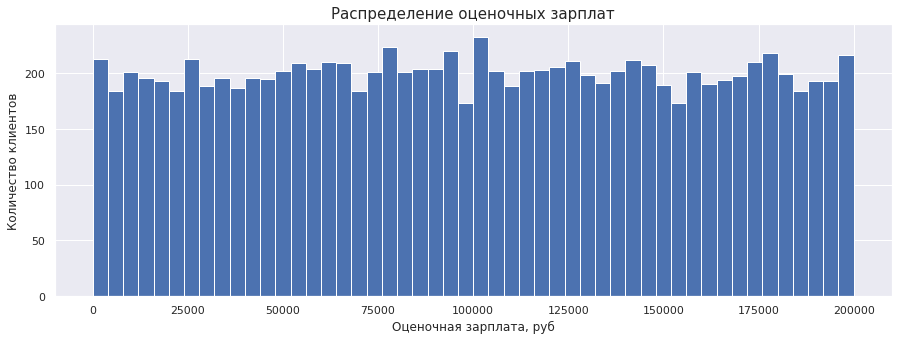

In [9]:
sns.set()
df.estimated_salary.plot.hist(figsize=(15,5), bins=50)
plt.xlabel('Оценочная зарплата, руб')
plt.ylabel('Количество клиентов')
plt.title('Распределение оценочных зарплат', size=15);

display (f'Процент зарплат ниже прожиточного минимума: {df[df.estimated_salary < 13026].shape[0]/df.shape[0]*100}%')

Как видим, размеры оценочных зарплат распределены очень равномерно. Нет перекоса ни в какую сторону. Почему же есть значения ниже прожиточного минимума, которых 6,52% ? 

Удалять мы их не будем, потому что обычно, банк оценивает зарплаты для возможности выдачи кредита. С большой вероятностью, это колонка обозначает платежеспособность. А конечная величина считается с вычетом прожиточного минимума. Поэтому видя даже значения, условно, с 11 рублями, удивляться не стоит, так как прожиточный минимум высчитывается системой автоматически из установленной зарплаты, данные по которой может предоставить клиент, либо у него зарплатная карта в данном банке, либо оценивается по другим критериям, известным банку (возможно по месячному обороту карты).

Так же можем взять теорию о том, что банк ориентируется на то (если клиент сам не предоставляет информацию о зарплате для кредита и не является зарплатным клиентом), что если владелец карты, например, является безработным, то любая сумма прошедшая через его карту, даже минимальная, будет отображаться в данной графе.

Более подробно пропуски относительно оттока изучим в **Исследовательском анализе**. В данном случае, просто посмотрим, есть ли что-то необычное относительно других признаков и выдвинем свои предположения о пропущенных значениях.

In [10]:
cat_list = ['city', 'gender', 'loyalty', 'churn', 'credit_card', 'products']

for x in cat_list:
    print( df[df.balance.isna()][x].value_counts(normalize=True) * 100, 
                                           '\n' + '---------' * 5)

Ярославль                  66.85
Рыбинск                    33.15
Name: city, dtype: float64 
---------------------------------------------
М                  54.27
Ж                  45.73
Name: gender, dtype: float64 
---------------------------------------------
1                  51.78
0                  48.22
Name: loyalty, dtype: float64 
---------------------------------------------
0                  86.18
1                  13.82
Name: churn, dtype: float64 
---------------------------------------------
1                  71.66
0                  28.34
Name: credit_card, dtype: float64 
---------------------------------------------
2                  71.88
1                  25.02
3                   2.71
4                   0.39
Name: products, dtype: float64 
---------------------------------------------


Из изученной информации можно сказать, что пропущенных значений в  балансах нет в Великом Ростове. Самое банальное предположение, что там у людей на балансе счета есть средства и, возможно, с этих филиалов отток меньше, чем из Ярославля и Рыбинска. Проверим позже. 

Среди клиентов с пропущенными значениями в балансе только 13,82%  ушли из банка. Маловероятно, что отсутсвие счета или средств на нём связано с оттоком. Так же среди этих клиентов 71,66% имеют кредитную карту. То есть, как минимум одним продуктом, клиент всё равно может пользоваться. Среди клиентов с ппропущенными значениями на балансе 71,88% пользуются двумя продуктами банка, т.е. большинство что-то используют.

Посмотрим есть ли нулевые или отрицательные балансы в общем датасете.

In [11]:
df[df.balance <= 0]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn


Как видим нулевых и отрицательных балансов нет. Вполне возможно, что пропущенные значения, означают, что у клиента просто 0 на счету. Либо счёт вообще не открыт, что более вероятно, так как в отчетности, при существующем счете, должна отображаться какая-то сумма, даже если это 0. Если счет не открыт, то данная графа просто пропускается, что и может означать пропущенное значение.

В исходных данных не указано, имеются ли ввиду, что эти счета, привязаны к дебетовой карте или счета, просто открытые для хранения средств. Узнать мы это не можем, поэтому можем только выдвигать теории. Заполнять эти данные будет некорректно, поэтому оставим их как есть. 

В **Исследовательском анализе** изучим более подробно, связаны ли пропущенные значения баланса на счете с оттоком. 
<br>
Мы привели названия столбцов к единому стилю, выдвинули теории о, возможно, аномальных маленьких значениях в разделе зарплат, предположили почему пропущенные значения могут быть в балансе. Пропуски не удаляем, дубликатов нет.



## Исследовательский анализ данных

### Распределение клиентов с пропусками в balance в разрезе других признаков

Итак, проверим пропущенные значения баланса в разрезе остальных признаков и визуализируем для наглядности.

In [12]:
missed_balance = df[df.balance.isna()]
missed_balance

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,"76,390.01",0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,"26,260.98",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,"179,436.60",0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,"195,192.40",0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,"167,773.55",0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0


In [13]:
def distribution (table):
    for col in ['objects', 'products']:
        plt.figure(figsize=(12,5))
        sns.countplot(data=table, x=col, hue=None)
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов по признаку {col}', size=15)
        plt.show()
    
    for col in ['city', 'gender', 'credit_card', 'loyalty', 'churn']:
        table.groupby(col)['user_id'].count().plot.pie(ylabel = ' ', radius=1.3, legend=False,
                    autopct='%1.1f%%')
        plt.title(f'Распределение клиентов по признаку {col}' + '\n'*2, size=15)
        plt.show()
        
    for col in ['score', 'age', 'estimated_salary']:
        plt.figure(figsize=(12,5))
        sns.histplot(data=table, x=col, hue=None, kde=True)
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов по признаку {col}', size=15)
        plt.show();

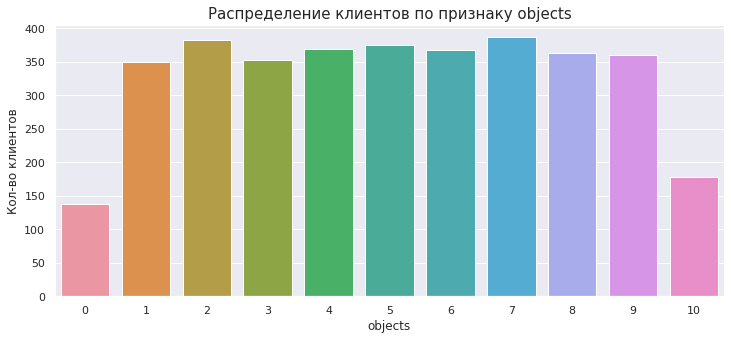

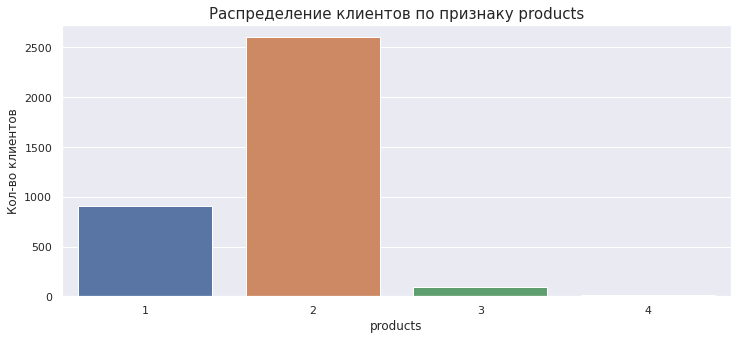

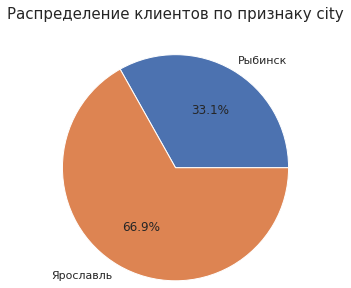

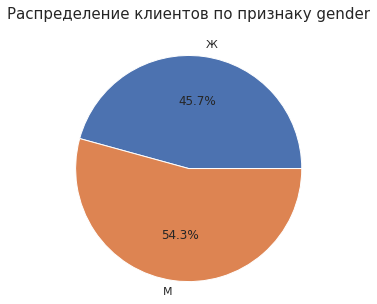

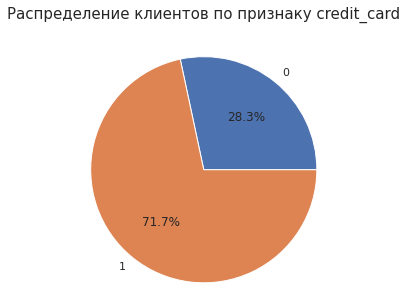

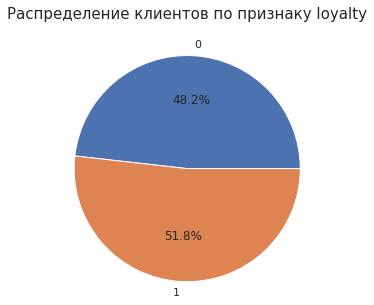

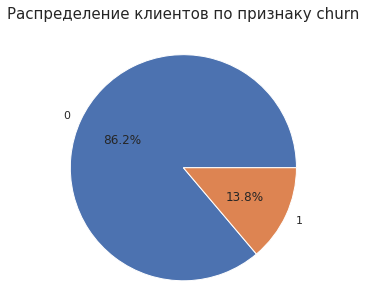

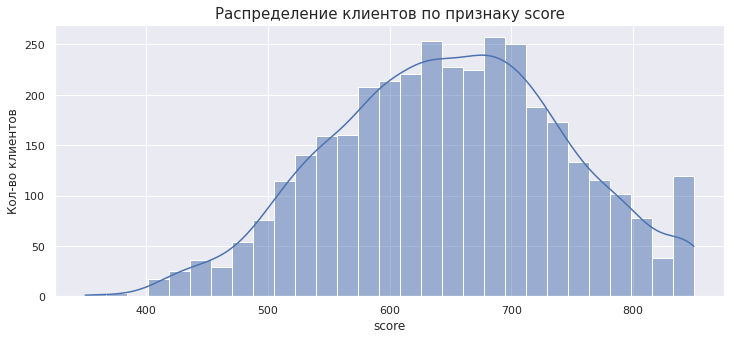

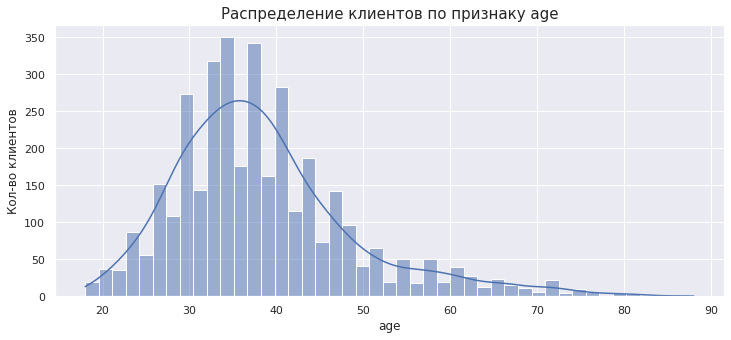

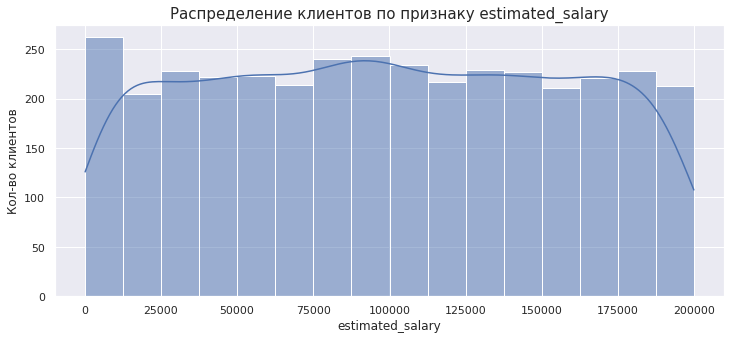

In [14]:
distribution(missed_balance)

Рассмотрев все графики клиентов с пустыми (или неоткрытыми) счетами, сделаем промежуточные выводы (некоторые мы подвели уже в **Предобработке данных**):

- пустых счетов (либо неоткрытых) нет у клиентов в Ростове. Связано ли это с тем, что из филиалов этого города меньшего всего оттока, проверим дальше. Больше всего данных клиентов в Ярославле;
<br>

- у 71,7% данных клиентов есть кредитная карта, и большая часть этих клиентов пользуются 2-мя продуктами;
<br>

- всего 13,8% данных клиентов ушло из банка. Преполагать, что пустой (или неоткрытый) счет является причиной ухода, пока нет;
<br>

- большая часть данных клиентов, в основном, в возрасте от 30 до 40 лет. У большинства клиентов с подобными счетами баллы кредитного скоринга выше среднего;
<br>

- остальные распределения по зарплатам, гендеру, объектам, активности - достаточно равномерные и в них нет ничего, притягивающего взгляд относительно баланса с пустым (или неоткрытым) счетом.

### Распределение клиентов по всем признакам

Далее, есть смысл посмотреть на общее распределение по всем признакам. Используем ранее созданную функцию.

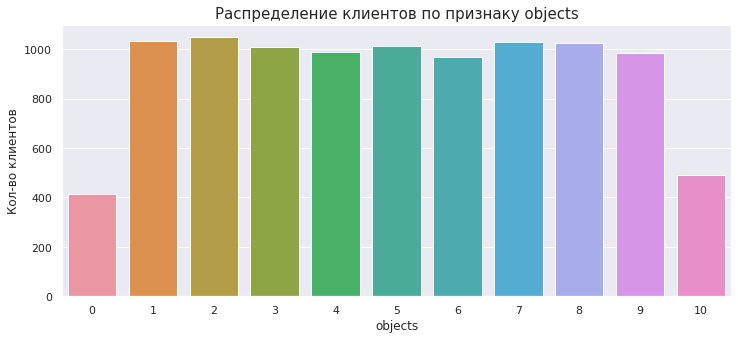

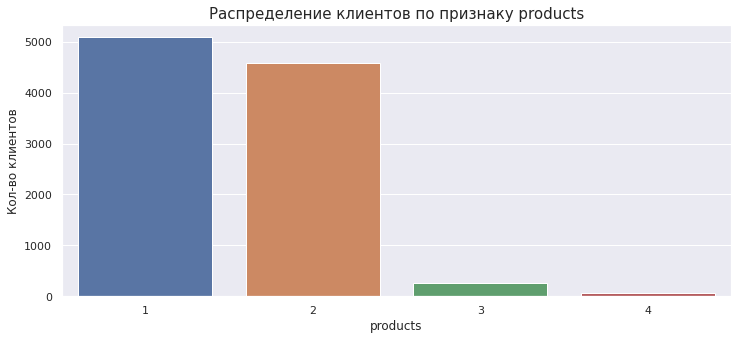

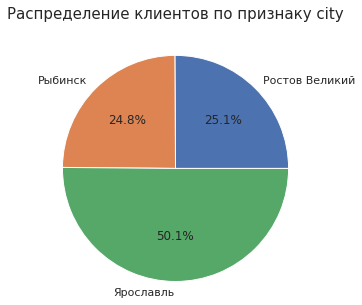

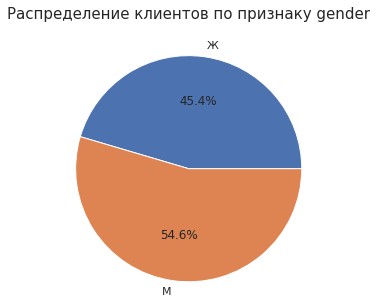

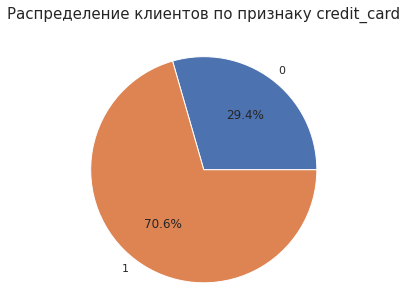

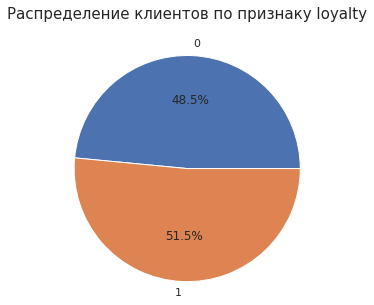

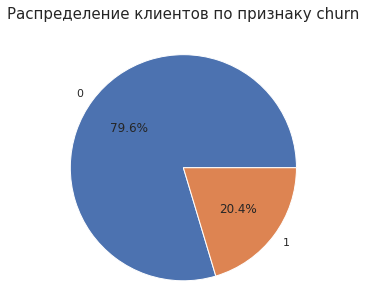

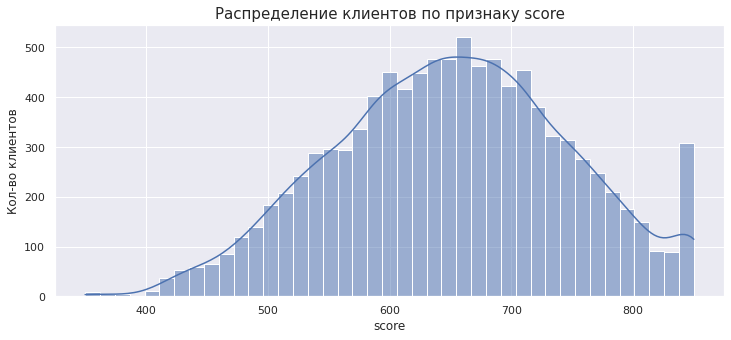

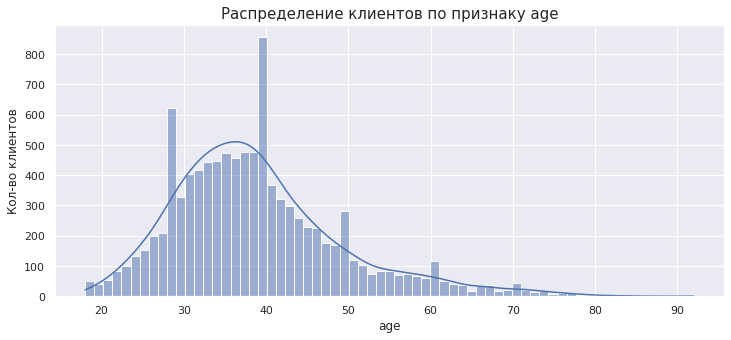

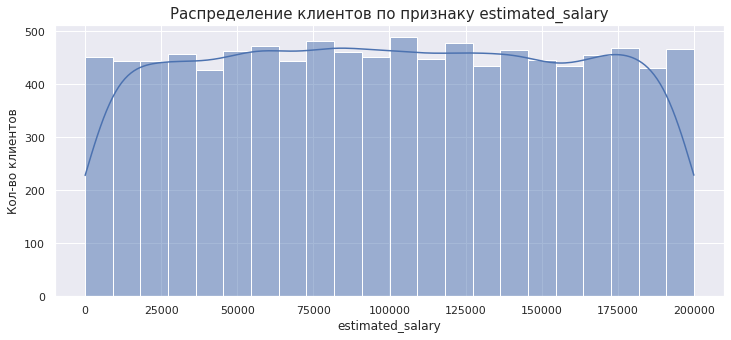

In [15]:
distribution(df)

Так же отдельно посмотрим на распределение по балансу на счету для тех, у кого он есть.

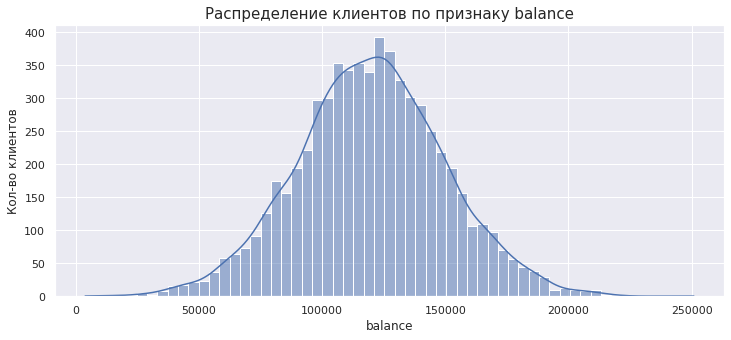

In [16]:
plt.figure(figsize=(12,5))

sns.histplot(data=df, x='balance', hue=None, kde=True)
plt.ylabel('Кол-во клиентов')
plt.title(f'Распределение клиентов по признаку balance', size=15)
plt.show()

Очевидные моменты в следующем:

- больше всего клиенты пользуются 1-2 продуктами;
<br>

- у большинтва клиентов (70,6%) есть кредитная карта;
<br>

- больше всего клиентов у банка в Ярославле (50%) ото всех, и по 25 % в Ростове и Рыбинске;
<br>

- отток клиентов из банка составляет 20,4%;
<br>

- меньше всего клиентов, у которых либо нет недвижимости, либо есть в количестве 10 шт. Остальные значения примерно одинаковы;
<br>

- у клиентов, которые имеют средства на счетах, в основном, от 100 до 150 тыс. руб.
<br>

- основной возраст клиентов, примерно, от 25 до 45 лет.


### Корреляция между признаками

Посмотрим как коррелируют признаки между собой:

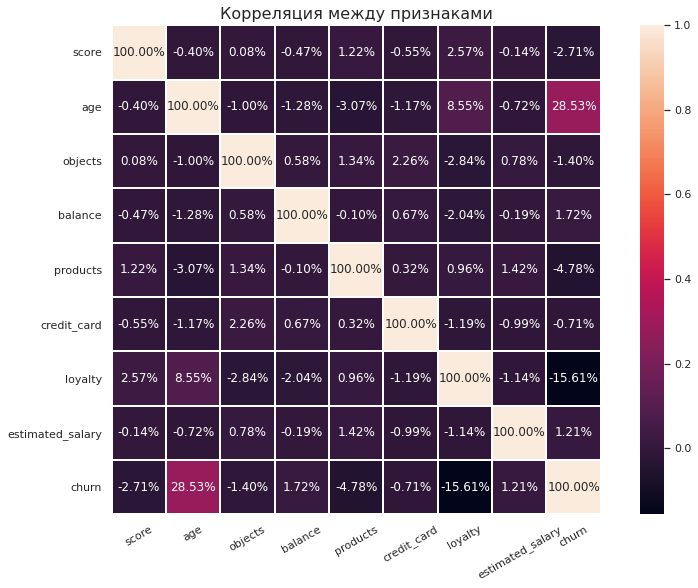

In [17]:
t_corr = df.drop(['user_id'], axis=1).corr()

plt.figure(figsize=(14,9))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(t_corr, annot=True, square=True, fmt='.2%', linewidths=1)
plt.title('Корреляция между признаками', size=16)
plt.xticks(rotation=30)

plt.show()

Сильной и даже средней корреляции между признаками нет. Если смотреть от того, что имеем, то слабая корреляция есть между возрастом и оттоком (28,53%) - чем старше клиент, тем больше вероятность его ухода. И обратно пропорциональная между активностью и оттоком (15,61%) - чем активнее клиент в банке, тем меньше вероятность его ухода.

### Распределение клиентов оттока по признакам.

Посмотрим на клиентов в разрезе по признаку ушел/остался (churn).

In [18]:
def churn_client(data):
    for col in ['city', 'gender', 'objects', 'credit_card', 'loyalty', 'products']:
        plt.figure(figsize=(12,5))
        ax = sns.countplot(data=data, x=col, hue='churn')
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов оттока по признаку {col}', size=15)
        plt.show()
        
    for col in ['age', 'score', 'estimated_salary', 'balance']:
        plt.figure(figsize=(12,5))
        ax = sns.histplot(data=data, x=col, hue='churn', kde=True)
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов оттока по признаку {col}', size=15)
        plt.show()

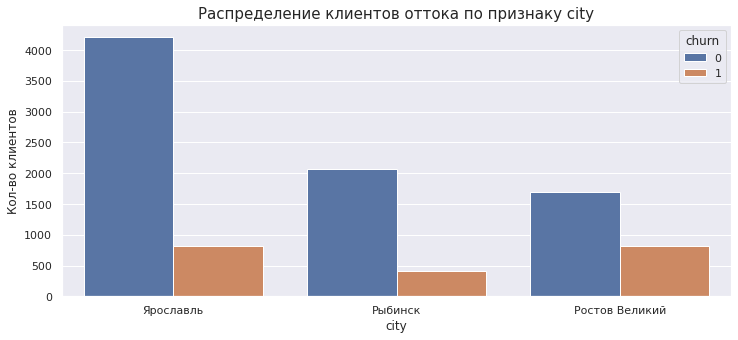

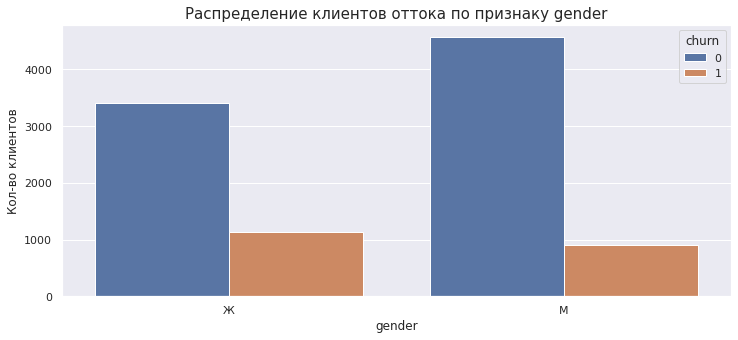

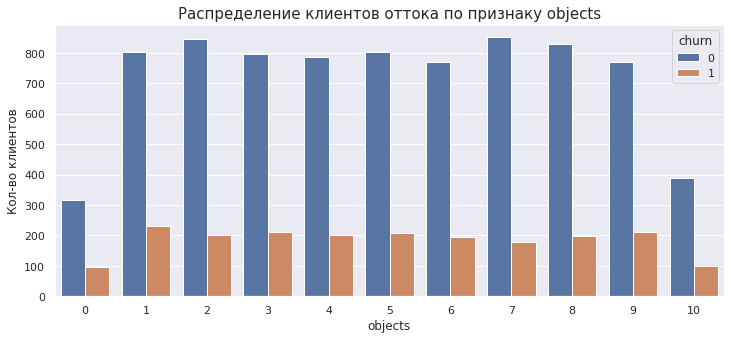

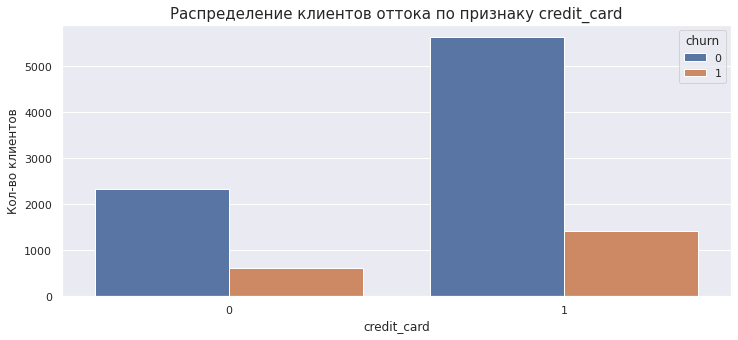

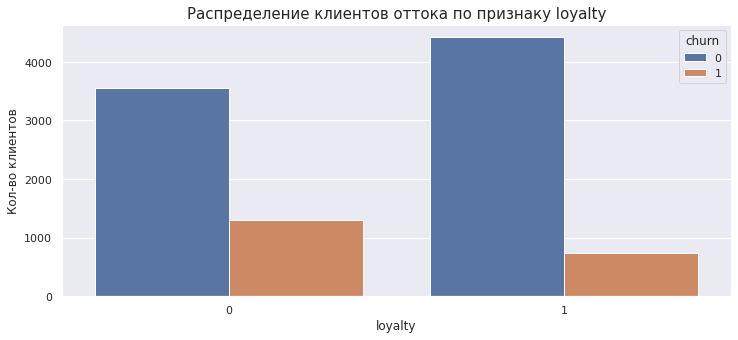

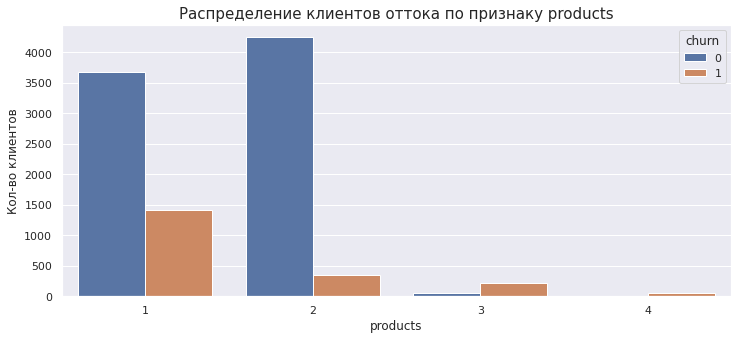

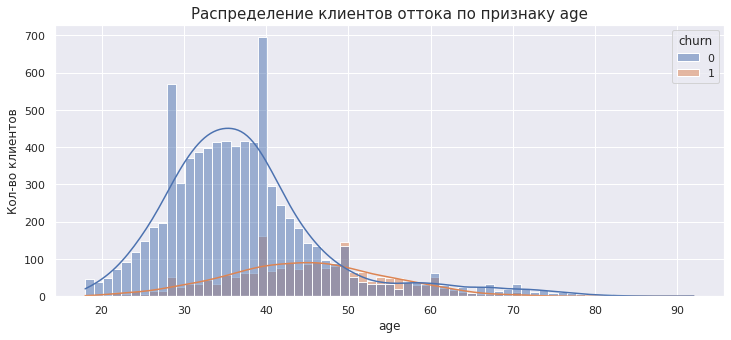

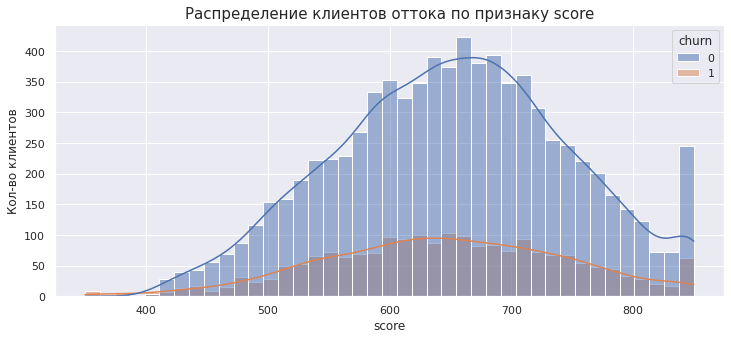

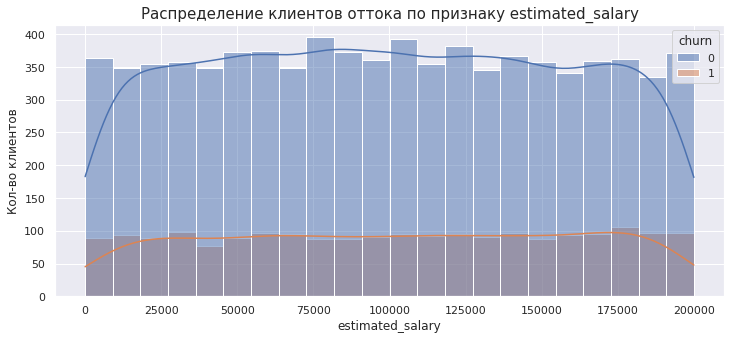

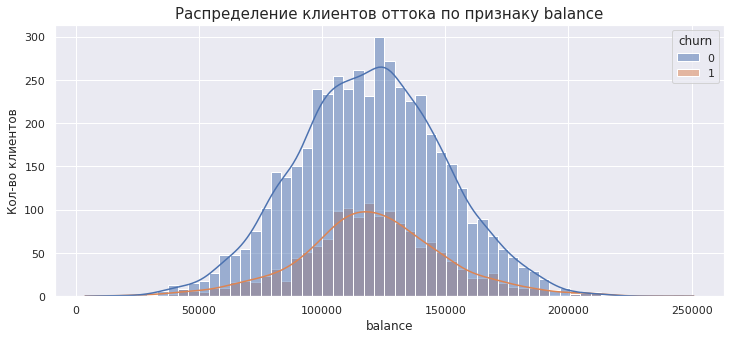

In [19]:
churn_client(df)

Ознакомившись с графиками, можем сказать следующее:

- теория о том, что из Ростова нет оттока, так как нет пустых счетов не подтвердилась. Более того, относительно клиентов Ростова, отток там больше, чем в других городах;
<br>

- несмотря на то, что женщин чуть меньше, чем мужчин, среди клиентов, отток среди них больше;
<br>

- подтверждается то, что мы уже видели на тепловой карте. Менее активные клиенты более подвержены уходу из банка, но это и логично;
<br>

- так же подтверждается, что средний возраст клиентов оттока выше, чем оставшихся. В основном от 40 до 53 лет, тогда когда средний возраст оставшихся примерно от 25 до 40;
<br>

- касаемо количества используемых продуктов, клиентов оттока больше, чем оставших, в группах с 3 и 4 продуктами. Да, там очень мало клиентов, но возможно, это показывает, что продукты не так интересны, чтобы остаться. Если смотреть относительно количества, меньше всего уходят клиенты которые пользуются 2-мя продуктами, и больше всего уходят, которые пользуются 1-м продуктом.
<br>

- на остальных графиках ушедшие/оставшиеся клиенты распределены достаточно равномерно. 

### Выводы

Определим по каким критериям есть смысл делать сегментацию, чтобы оценить отток. Отметим следующие выводы из проведенного анализа:

- в отток попадают 20% всех клиентов;
<br>

- чем старше клиент, тем более он склонен к уходу. Менее активные клиенты, что логично, так же склонны к уходу;
<br>

- больше всего уходят клиенты, которые пользуются одним продуктом. Очень мало клиентов, которые пользуются 3-мя и более продуктами, которые так же уходят;
<br>

- пустой (неокрытый счет) не является причиной оттока клиентов или причиной остаться (пример тому - Ростов);
<br>

- кредитная карта есть у 71% клиентов, но это так же никак не влияет на отток. Уходят и остаются примерно в равном количестве от тех, кто имеют и не имеют кредитные карты. Большинство кредитных карт могут оставаться не использованными почти всё время.
<br>

- среди женщин отток больше, чем среди мужчин;
<br>

- остальные признаки, неосвещенные выше, не являются причиной оттока клиентов.

Исходя из этих выводов, так как нам важно уменьшить отток, сегментацию можно сделать по 3-м направлениям и рассмотреть пристальнее для дальнейших рекомeндаций: по возрасту, по количестве продуктов и по полу. Среди этих признаков более заметен отток.

## Сегментация данных (выделение сегментов)

Мы пришли к выводу, что есть смысл сегментировать клиентов по 3-м признакам: возраст, количество используемых продуктов и пол. Три признака, где отчетливо есть за что зацепиться и рассмотреть подробнее.



### Сегментация по полу

Рассмотрим сначала сегмент по полу так же, с помощью функции:

In [20]:
def gender_client(data):
    for col in ['city', 'churn', 'objects', 'credit_card', 'loyalty', 'products']:
        plt.figure(figsize=(12,5))
        ax = sns.countplot(data=data, x=col, hue='gender')
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов разного пола по признаку {col}', size=15)
        plt.show()
        
    for col in ['age', 'score', 'estimated_salary', 'balance']:
        plt.figure(figsize=(12,5))
        ax = sns.histplot(data=data, x=col, hue='gender', kde=True)
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов разного пола по признаку {col}', size=15)
        plt.show()

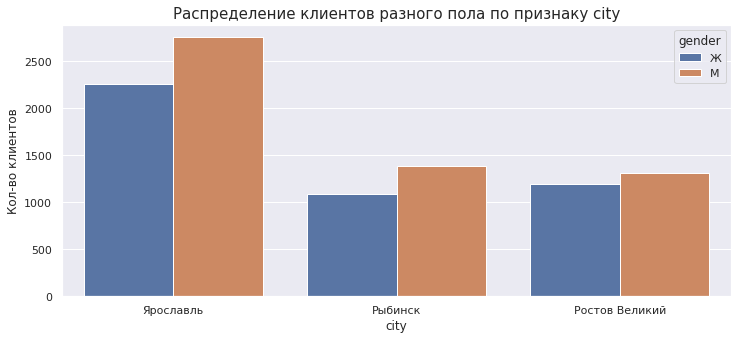

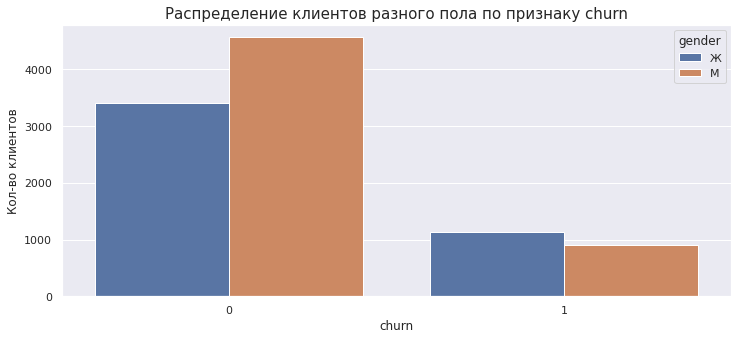

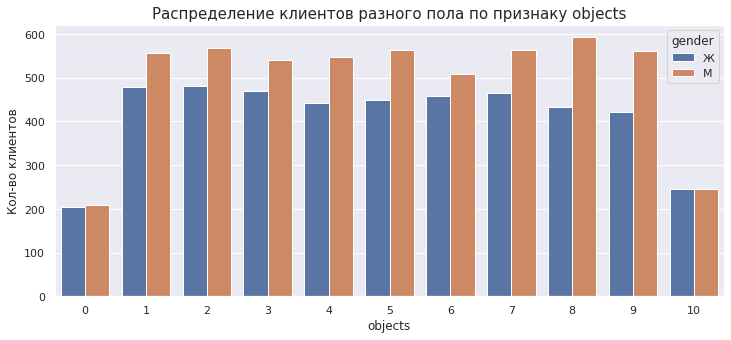

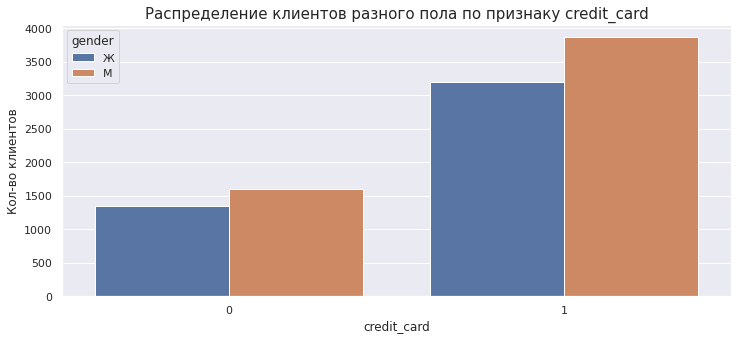

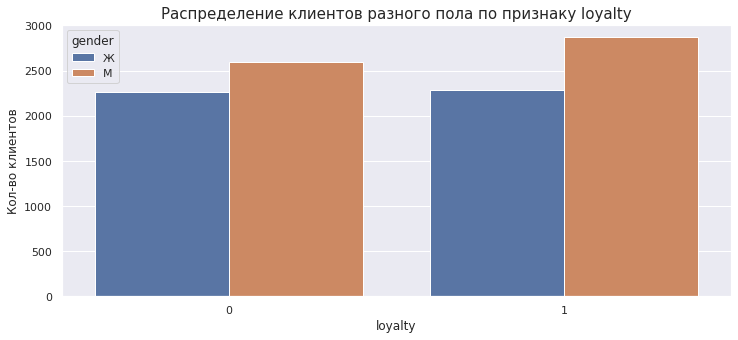

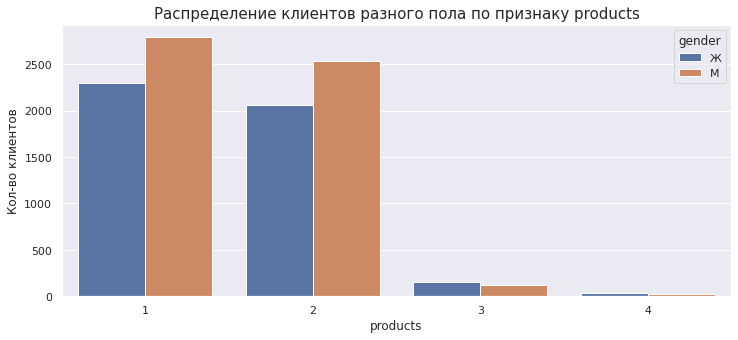

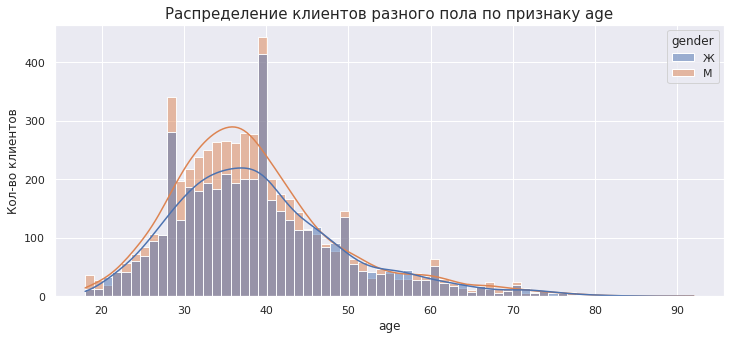

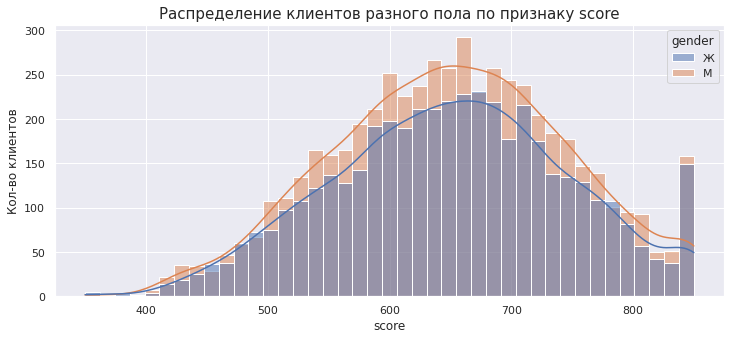

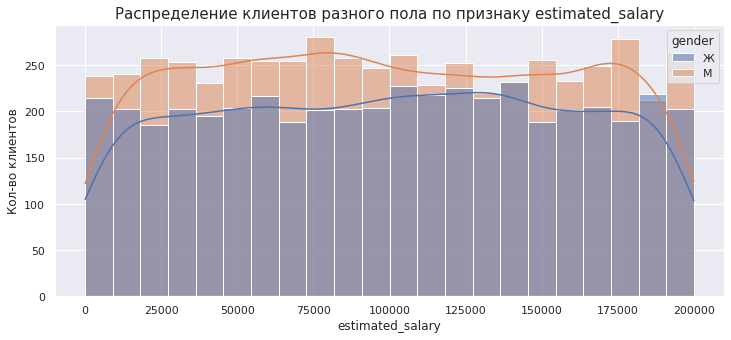

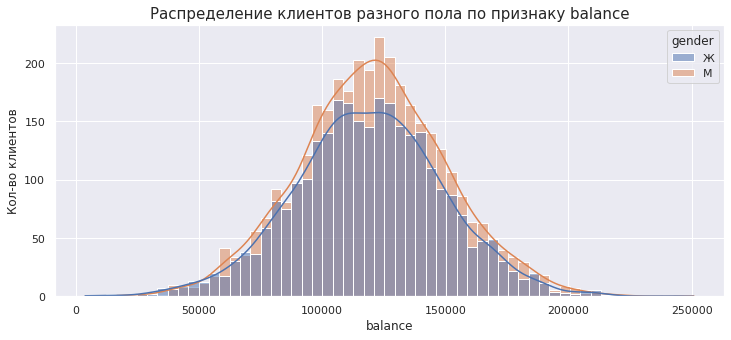

In [21]:
gender_client(df)

Видим, что активность среди женщин распределена примерно 50 на 50. Мужчины более активнее в пользовании продуктами. Но тем не менее, женщины чаще используют 3 и более продукта, вероятно из-за природного любопытства. Но это не заставляет их задерживаться в качестве клиентов банка чаще, чем мужчин. Видимо, продукты не так интересны.

Посмотрим отдельно на средние показатели мужчин и женщин в разрезе оставшихся и ушедших клиентов

In [22]:
display ('Мужчины', df[(df.gender == 'М')].drop(['user_id'], axis=1).groupby('churn').mean(),
         'Женщины', df[(df.gender == 'Ж')].drop(['user_id'], axis=1).groupby('churn').mean())

'Мужчины'

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,651.63,37.43,5.08,"120,086.61",1.54,0.71,0.56,"99,680.39"
1,643.41,44.91,4.93,"122,347.91",1.43,0.70,0.36,"99,584.29"


'Женщины'

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,652.15,37.38,4.98,"118,778.32",1.56,0.70,0.55,"99,816.07"
1,646.88,44.78,4.93,"119,449.63",1.51,0.70,0.36,"102,948.99"


По сравнению двух таблиц, первое, что стоит отметить - у женщин, в среднем, выше оценочная зарплата. Более того, уходят как раз те, у которых это значение, в среднем, более высокое. Теоретически, банк теряет более платежеспособных клиентов, в лице женщин. Но, дабы, не обижать мужской пол, отметим, что на балансе счетов они в среднем хранят больше средств. 

Так же отметим, что как у женщин, так и у мужчин, в отток попадают клиенты, у которых, в среднем, выше баланс на счете.

Ещё видим, опять взаимосвязь с возрастом у мужчин и у женщин. С банком остаются оба пола со средним возрастом 37 лет. А в отток попадают со средним возрастом 45 лет. 

Построим матрицу корреляций для женского и мужского пола:

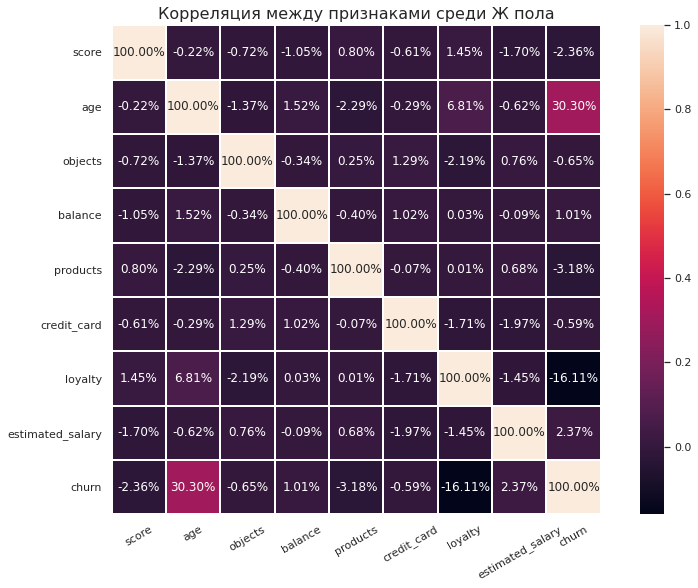

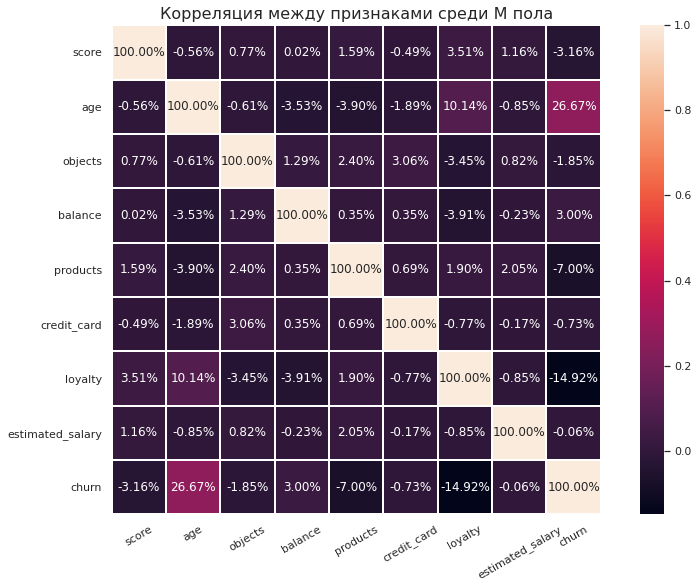

In [23]:
for x in df['gender'].unique():
    f_corr = df[(df.gender == x)].drop(['user_id'], axis=1).corr()

    plt.figure(figsize=(14,9))
    #нарисуем тепловую карту с подписями для матрицы корреляций
    sns.heatmap(f_corr, annot=True, square=True, fmt='.2%', linewidths=1)
    plt.title(f'Корреляция между признаками среди {x} пола', size=16)
    plt.xticks(rotation=30)

    plt.show()

Если говорить хотя бы о какой-либо корреляции (слабой), то так же видим, что, чем старше мужчина или женщина, тем более они склонны покинуть банк, и тем менее они активны. Поэтому первым звоночком к оттоку клиентов, касаемо обоих полов, будет снижение активности ( возможно недостаточно интересный продукт) и "взросление" клиента (недостаточно интересных предложений для более старшего поколения). 

### Сегментация по количеству продуктов

Рассмотрим сегмент клиентов по количеству пользования продуктов.

In [24]:
def products(data):
    for col in ['city', 'churn', 'objects', 'credit_card', 'loyalty', 'gender']:
        plt.figure(figsize=(12,5))
        ax = sns.countplot(data=data, x=col, hue='products')
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов с кол-вом продуктов по признаку {col}', size=15)
        plt.show()
        
    for col in ['age', 'score', 'estimated_salary', 'balance']:
        plt.figure(figsize=(12,5))
        ax = sns.histplot(data=data, x=col, hue='products', kde=True, palette="tab10", alpha=0.3)
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов с кол-вом продуктов по признаку {col}', size=15)
        plt.show()

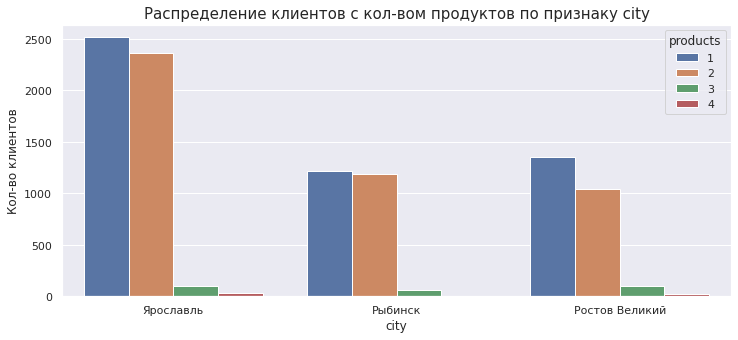

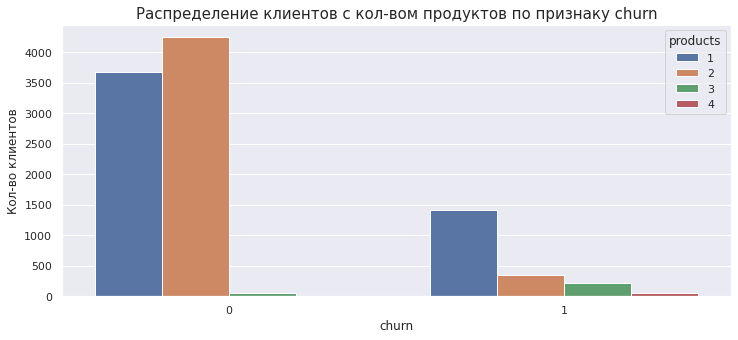

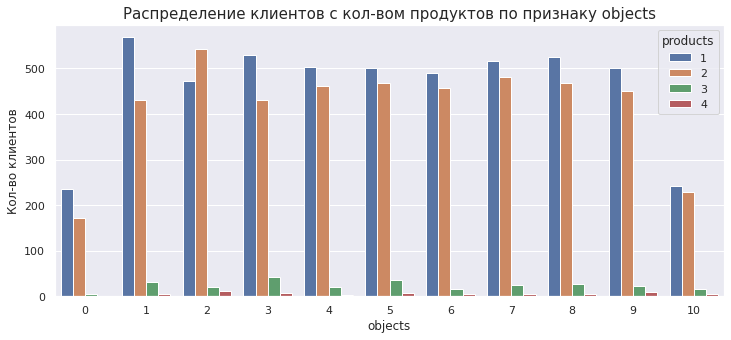

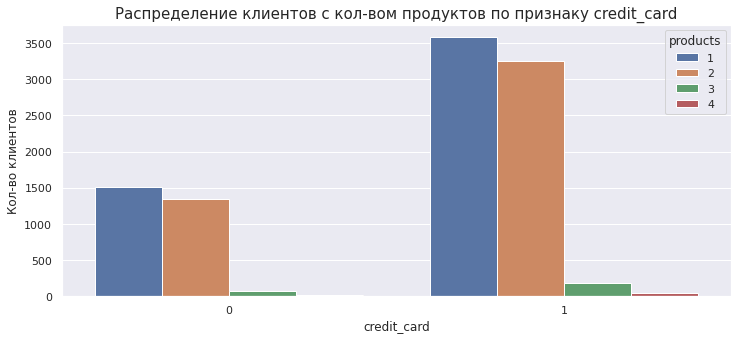

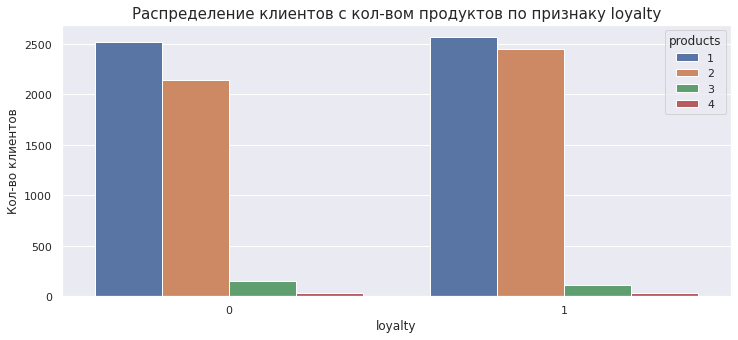

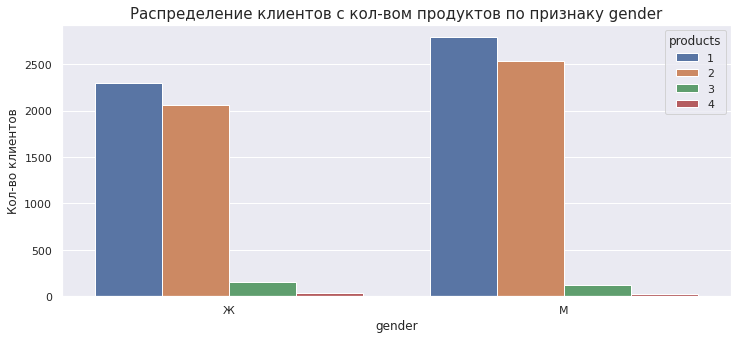

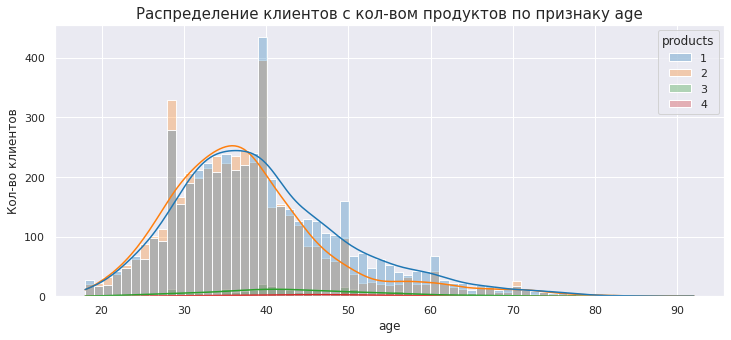

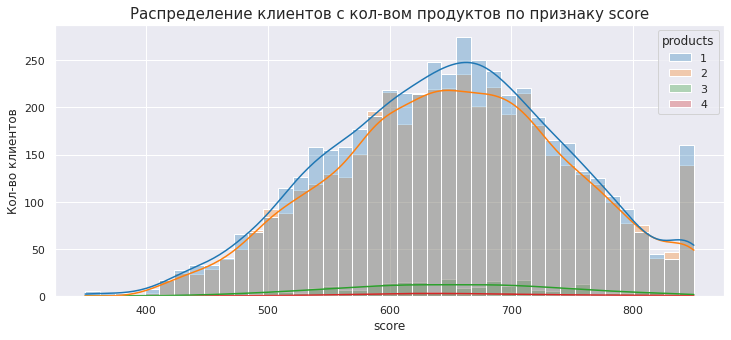

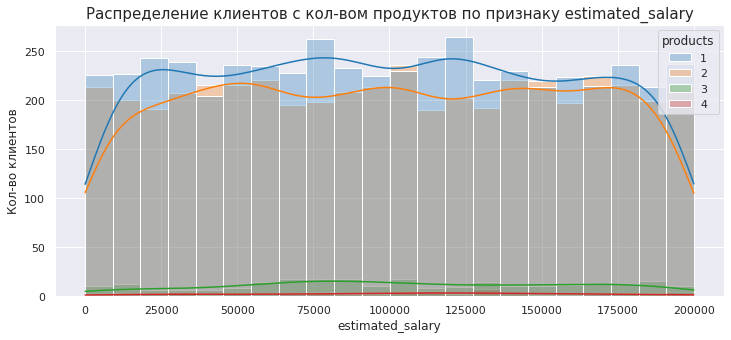

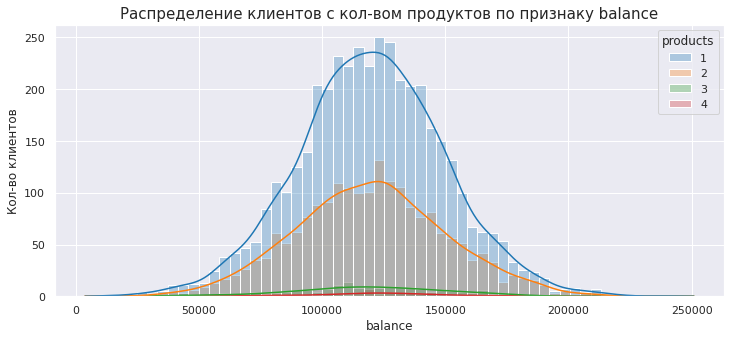

In [25]:
products(df)

Изучив графики, можем сказать следующее и что-то подвердить, о чем говорили ранее. 

- большинство пользователей пользуется либо одним, либо двумя продуктами;
<br>

- больше всего пользователей попадают в отток с одним продуктом. С двумя продуктами больше всего остается в банке. А с 3-4 продуктами отток опережает оставшихся клиентов. Более того, среди клиентов с 4-мя продуктами вообще нет оставшихся клиентов. Видимо продукты настолько неинтересны, что, абсолютно не задерживают на себе внимание клиентов;
<br>

- можем заметить по возрасту, что большинство клиентов примерно до 37-38 лет пользуются двумя продуктами. После 38 лет, большинство клиентов пользуется 1 продуктом. Тремя и четырьмя продуктами пользуются очень мало клиентов, но большее их количество находится в диапазоне 40-42 лет;
<br>

Стоит рассмотреть клиентов по кол-ву продуктов в разрезе оттока.

In [26]:
for x in df['products'].unique():
    display(f'Клиенты, пользующиеся {x} продуктами', df[(df.products == x)]\
            .drop(['user_id', 'products'], axis=1).groupby('churn').mean())
    

'Клиенты, пользующиеся 1 продуктами'

,score,age,objects,balance,credit_card,loyalty,estimated_salary
churn,,,,,,,
0,650.43,37.67,5.00,"119,488.13",0.70,0.57,"99,045.36"
1,645.72,44.91,4.91,"121,072.46",0.70,0.34,"100,639.83"


'Клиенты, пользующиеся 3 продуктами'

,score,age,objects,balance,credit_card,loyalty,estimated_salary
churn,,,,,,,
0,670.04,37.30,4.85,"118,423.61",0.74,0.61,"92,560.21"
1,643.52,44.43,5.04,"119,542.27",0.71,0.39,"106,776.61"


'Клиенты, пользующиеся 2 продуктами'

,score,age,objects,balance,credit_card,loyalty,estimated_salary
churn,,,,,,,
0,652.89,37.19,5.06,"119,628.16",0.71,0.54,"100,416.63"
1,643.61,44.66,4.91,"119,877.18",0.68,0.39,"100,883.31"


'Клиенты, пользующиеся 4 продуктами'

,score,age,objects,balance,credit_card,loyalty,estimated_salary
churn,,,,,,,
1,653.58,45.68,5.30,"122,260.61",0.68,0.48,"104,763.72"


Итак, опять мы наблюдаем картину, как из каждой группы уходят более денежные клиенты. В группе с 2-мя продуктами, самой стабильной по оставшимся клиентам, тем не менее уходят клиенты с самой большой средней оценочной зарплатой из всех групп.

Ещё раз обратим внимание, что 4-мя продуктами в итоге не пользуется никто, попробовав однажды. В среднем, у данных клиентов самый высокий показатель денежных средств на счету баланса.

Так же снова видим, что в среднем, более взрослый клиент уходит из банка.

Попробуем увидеть взаимосвязь в каждой группе между признаками.

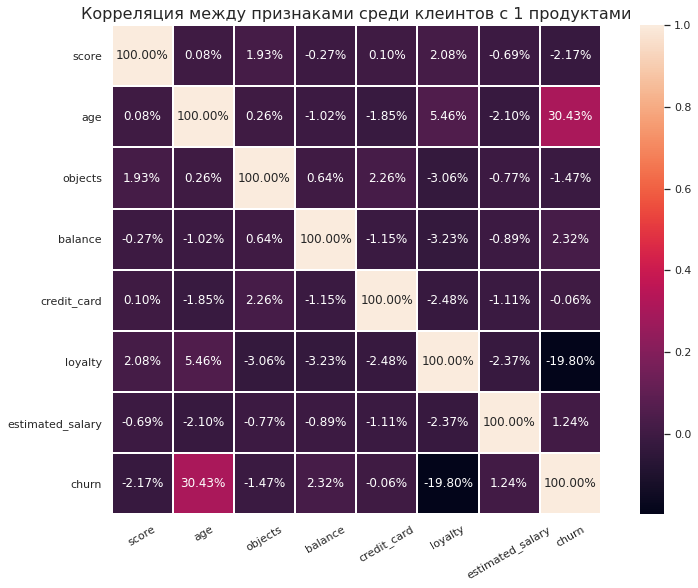

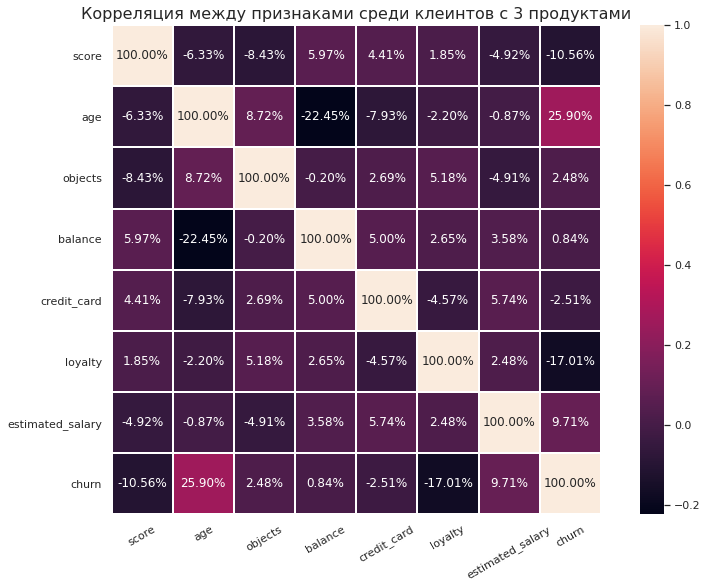

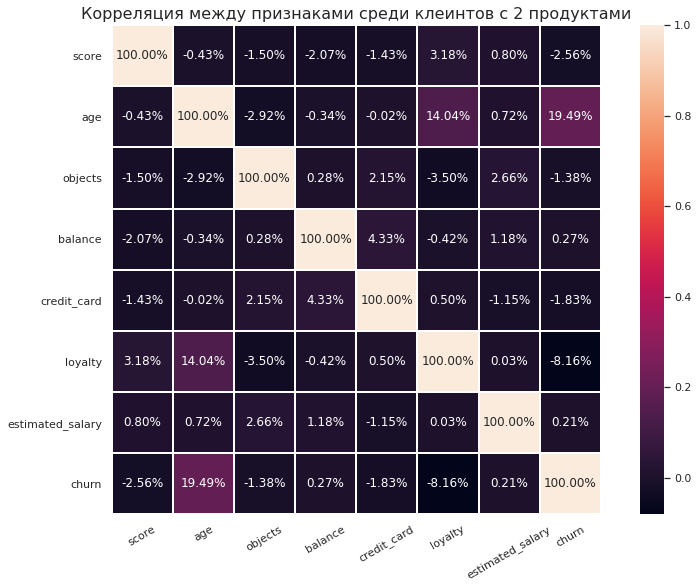

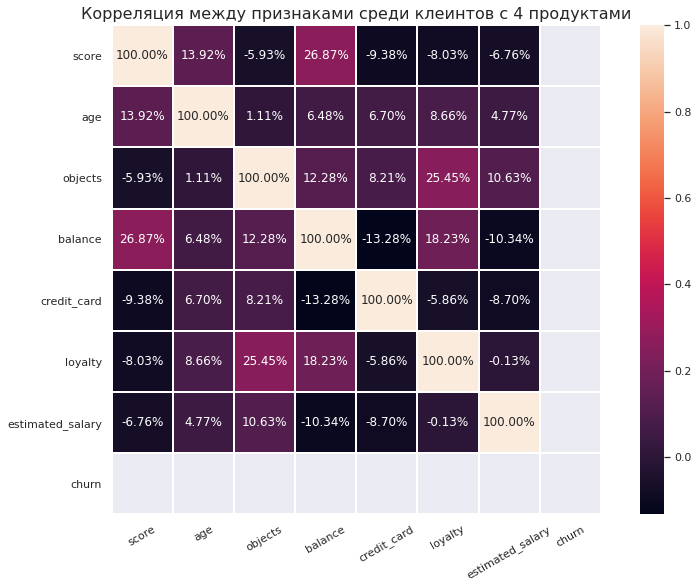

In [27]:
for x in df['products'].unique():
    f_corr = df[(df.products == x)].drop(['user_id', 'products'], axis=1).corr()

    plt.figure(figsize=(14,9))
    #нарисуем тепловую карту с подписями для матрицы корреляций
    sns.heatmap(f_corr, annot=True, square=True, fmt='.2%', linewidths=1)
    plt.title(f'Корреляция между признаками среди клеинтов с {x} продуктами', size=16)
    plt.xticks(rotation=30)

    plt.show()

Что касается клиентов, использующих 1 продукт, видим слабую зависимость так же от возраста и от активности, как мы наблюдали ранее. Чем старше клиент, чем меньше активность, тем вероятнее того, что он уйдёт.

Касаемо группы клиентов с 2-мя продуктами, совсем слабая корреляция так же с возрастом и с активностью. Только в данном случае, с возрастом у клиента чуть повышается активность, несмотря на то, что вероятность уйти больше. Клиенты готовы что-то делать, использовать продукты, но видимо не находят то, что им надо. И, как мы видели, выше, после 37-38 лет, клиенты чаще переходят на 1 продукт, после 2 продуктов. Это показатель неудержания интереса клиента.

В группе клиентов с 3-мя продуктами, так же тенденция - чем старше клиент, тем вероятнее, что уйдет. Так же в этой группе, есть слабая, но интересная обратнопропорциональная взаимосвязь между возрастом и балансом. То есть вероятность того, что баланс станет меньше с возрастом увеличивается. С возрастом человек всё больше склонен к накоплению средств, и вероятность того, что это будет не наш банк, повышается. Вероятно, стоит пересмотреть условия вкладов и накопительных счетов.

Группа клиентов с 4-мя продуктами одна из самых небольших, но показательна. Клиенты в этой группе вообще не задерживаются. 100% отток. При этом, те клиенты которые были в этой группе, вероятно достаточно платежеспособны, как мы заметили выше. В данном случае, есть слабые взаимосвязи между кол-вом объектов и активностью, а так же балансом и скорингом. Чем больше объектов, тем больше клиентов готовы к активности, но видимо её некуда проявить. И так же есть вероятность, что чем больше баланс, тем выше баллы кредитного скоринга. Если логически подвести, вероятно, это категория клиентов, которые выбирают банк для серьезных задач: с недвижимостью, кредитами, возможно инвестициями и подобными вещами. Видимо наш банк не может предоставить этот фундамент для подобных клиентов и они уходят вообще. Это большой минус.



### Сегментация по возрасту

По возрасту достаточно разделить на 3 сегмента: молодые, среднего возраста, пенсионеры.

- молодые - до 35 лет, 
- среднего возраста - от 36 до 56 лет, 
- пенсионеры от 57 лет.

Добавим ещё один столбец `age_group` с группировкой по возрасту в наш датасет с помощью логической индексации:

In [28]:
df.loc[df.age <= 35, 'age_group'] = 'Молодые'
df.loc[(df.age > 35) & (df.age <= 56), 'age_group'] = 'Среднего возраста'
df.loc[df.age > 56, 'age_group'] = 'Пенсионеры'

Посмотрим процентное соотношение среди данных возрастных групп:

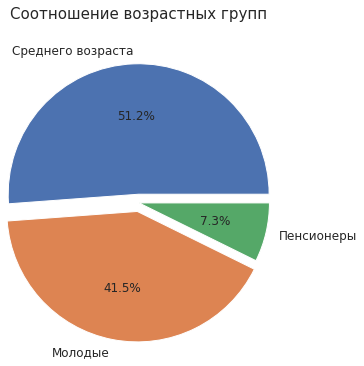

In [29]:
df['age_group'].value_counts().plot.pie(radius=1.5, ylabel='',
                                        autopct='%1.1f%%', 
                                        fontsize=12,
                                        explode=(0.1,0.1,0))
plt.title('Соотношение возрастных групп' + '\n'*4, size=15)
plt.show()


Как видим большую часть клиентов банка составляют клиенты среднего возраста (51,2%), и очень мало - пенсионеры (всего 7,3%). Пенсионеров, конечно, вряд ли будет больше, чем других возрастов, но очевидно, что из среднего возраста в пенсионеры переходит меньше, чем могло бы, судя из анализа, который мы уже провели в проекте.

Посмотрим каждую возрастную категорию в разрезе остальных признаков.

In [30]:
def age_group(data):
    for col in ['city', 'churn', 'objects', 'credit_card', 'loyalty', 'gender', 'products']:
        plt.figure(figsize=(12,5))
        ax = sns.countplot(data=data, x=col, hue='age_group')
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов с кол-вом продуктов по признаку {col}', size=15)
        plt.show()
        
    for col in ['score', 'estimated_salary', 'balance']:
        plt.figure(figsize=(12,5))
        ax = sns.histplot(data=data, x=col, hue='age_group', kde=True, palette="tab10", alpha=0.3)
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов с кол-вом продуктов по признаку {col}', size=15)
        plt.show()

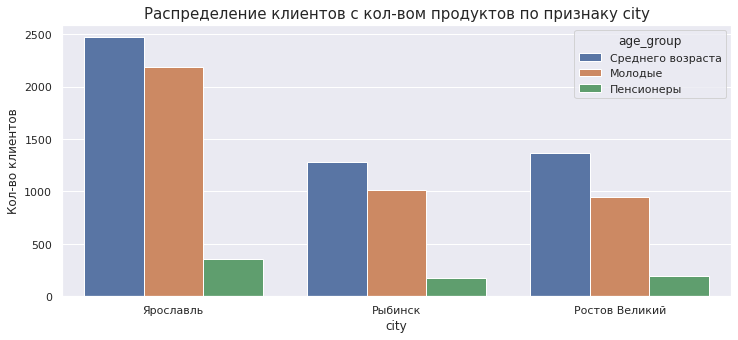

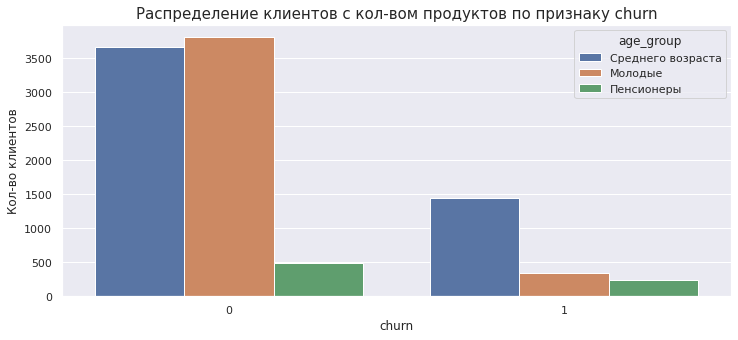

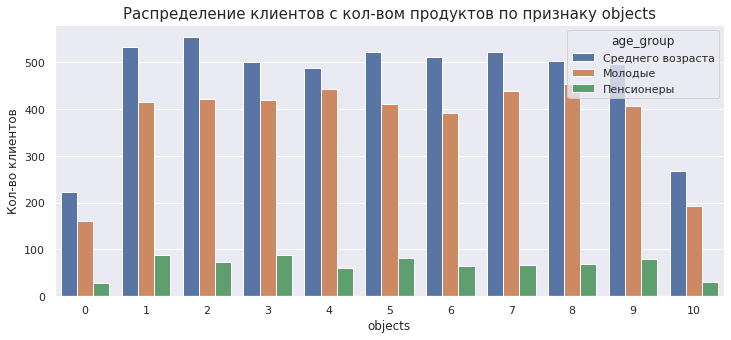

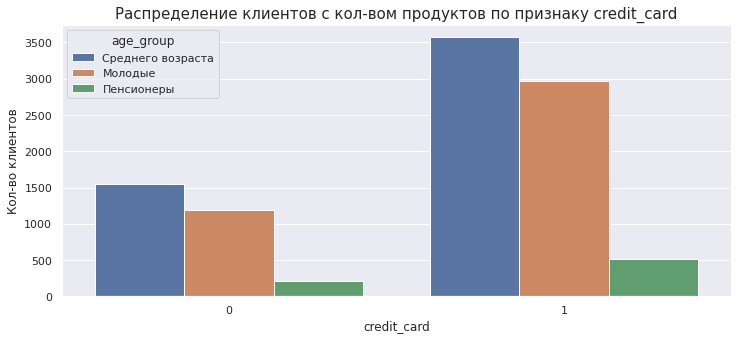

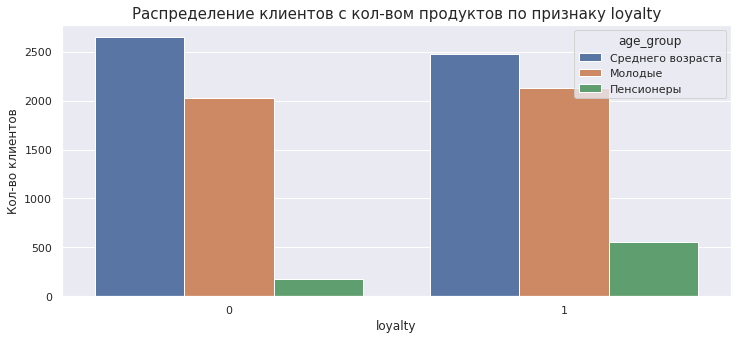

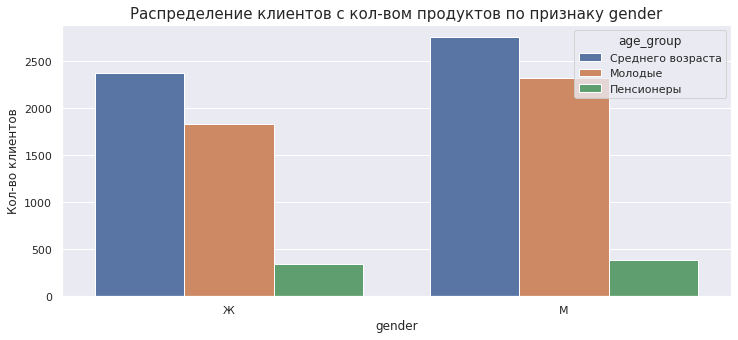

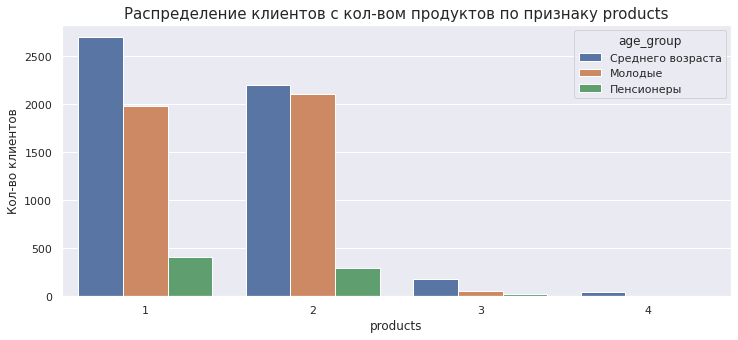

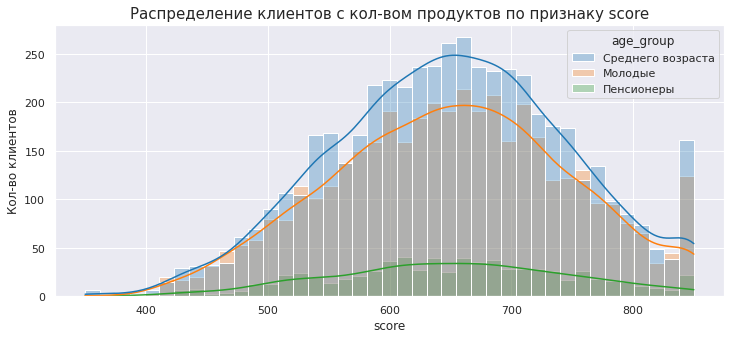

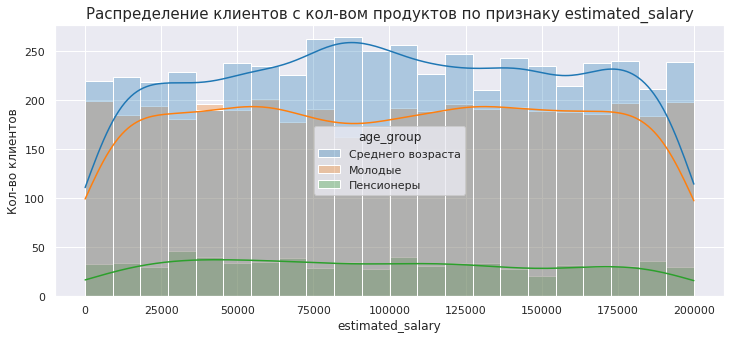

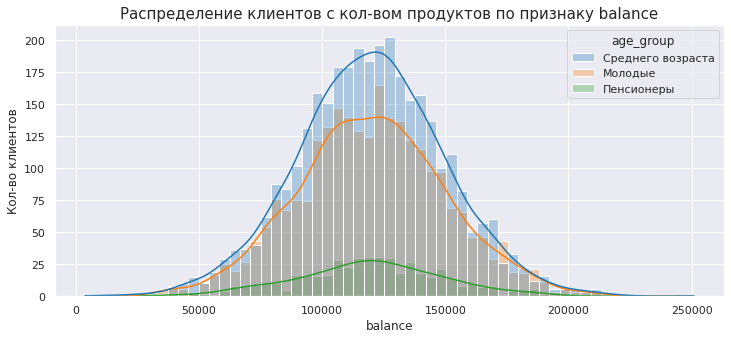

In [31]:
age_group(df)

Из полученных графиков, можем увидеть, что наибольшее количество всех возрастных групп находятся в Ярославле. Важно отметить, что из оставшихся, больше всего клиентов молодого возраста, а ушедших - среднего возраста. Так же, относительно пенсионеров, в отток попадают почти 50% от оставшихся. Видим, что основные проблемы начинаются с клиентами более старшими, начиная со среднего возраста.

Неактивных клиентов среднего возраста больше, чем активных. Так же отметим, что только клиенты среднего возраста пользуются (но в дальнейшем уходят, видимо, не получая желаемого) 4-мя продуктами. Клиенты молодого возраста чаще пользуются двумя продуктами, чем одним.

Посмотрим на средние значения в разрезе оттока.

In [32]:
for x in df['age_group'].unique():
    display(f'{x} клиенты', df[(df.age_group == x)]\
            .drop(['user_id'], axis=1).groupby('churn').mean())

'Среднего возраста клиенты'

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,653.08,41.38,5.02,"119,611.26",1.54,0.70,0.53,"99,974.01"
1,643.82,45.52,4.93,"120,114.70",1.48,0.69,0.36,"102,181.95"


'Молодые клиенты'

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,650.60,29.97,5.05,"119,469.49",1.55,0.71,0.52,"99,972.19"
1,650.49,30.41,5.00,"124,405.04",1.45,0.72,0.37,"101,268.12"


'Пенсионеры клиенты'

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,652.40,65.63,4.93,"119,480.18",1.50,0.71,0.96,"96,127.68"
1,647.12,61.34,4.84,"119,297.12",1.50,0.70,0.36,"97,501.83"


По традиции, так же видим, что уходят более денежные клиенты, у которых, в среднем, оценочная зарплата и суммы на счетах выше. Что касается клиентов молодого и среднего возраста, среди них уходят клиенты, в среднем, старше относительно своего возраста. Но если возьмем сегмент пенсионеров, то там уходят пенсионеры более молодые относительно своего возраста. Люди выбирают банк, вероятно, до конца жизни, и те, кто только, в основном, становятся пенсионерами, более склонны к уходу. Остаются, в основном, люди, которые на пенсии не меньше 5 лет и не хотят перемен.

Проверим корреляции между признаками среди возрастных сегментов.

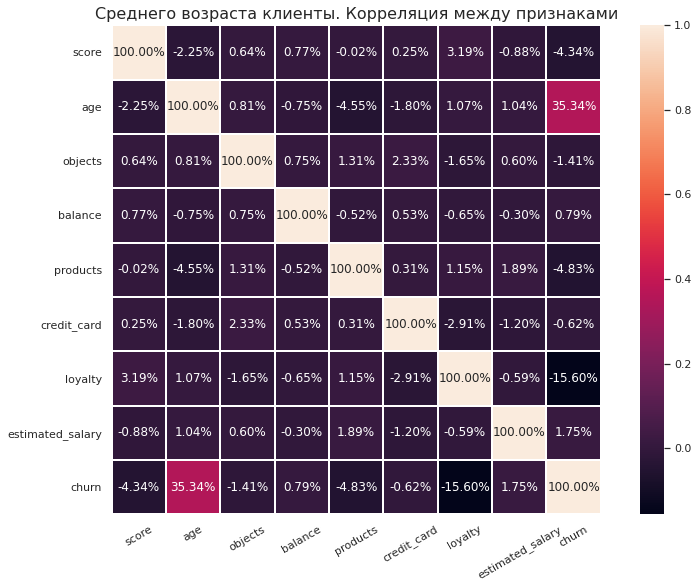

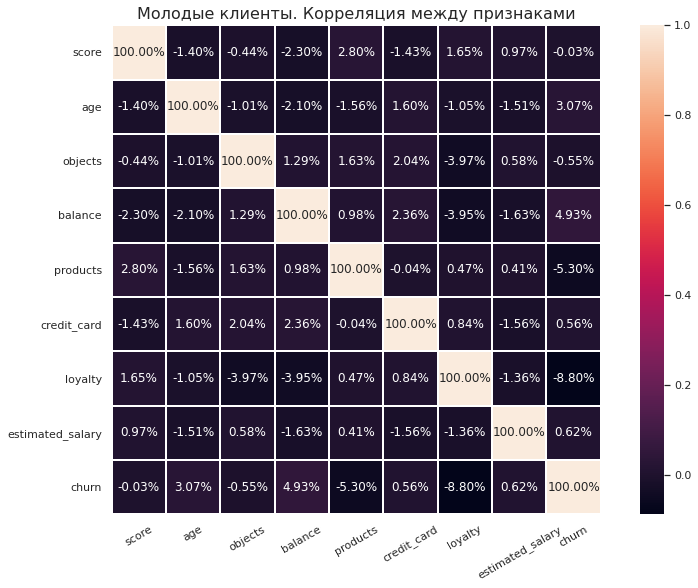

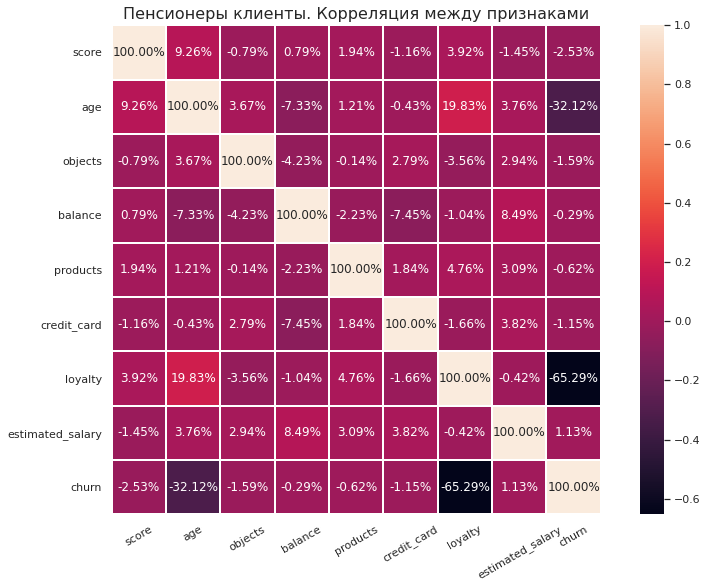

In [33]:
for x in df['age_group'].unique():
    f_corr = df[(df.age_group == x)].drop(['user_id'], axis=1).corr()

    plt.figure(figsize=(14,9))
    #нарисуем тепловую карту с подписями для матрицы корреляций
    sns.heatmap(f_corr, annot=True, square=True, fmt='.2%', linewidths=1)
    plt.title(f'{x} клиенты. Корреляция между признаками', size=16)
    plt.xticks(rotation=30)

    plt.show()

Вцелом, тенденция у среднего сегмента та же, что и раньше. Велика вероятность ухода при повышении возраста  и снижении активности.

Самые стабильные - это клиенты молодого возраста. Нет никаких всплесков по корреляции, даже максимально слабых.

Среди пенсионеров, та же тенденция, о чем мы говорили выше. Чем моложе пенсионер, тем больше вероятность его ухода. Видимо, условия для песнионеров не совсем выгодны. Очень ощутимо падает активность с повышением вероятности ухода.

### Выводы

Подведем промежуточные выводы по сегментации:

- отметим, что клиенты, попадающие в отток, по всем сегментам, в среднем, более денежные и платежеспособные. Так же чем старше, в общем, клиент, тем вероятность его ухода выше;
<br>

- у мужчин, в среднем, выше баланс на счете, у женщин - выше оценочная зарплата. Это может говорить о том, что мужчины более склонны к накоплению, а женщины к тратам. Поэтому нужно создать условия обоим полам.
<br>

- женщин попадает в отток больше мужчин, относительно одного пола. Так же женщины больше мужчин пробуют пользоваться 4-мя продуктами;
<br>

- отметим, что большинство клиентов примерно до 37-38 лет пользуются двумя продуктами. После 38 лет, большинство клиентов пользуется 1 продуктом. В общем, клиенты в большинстве случаев пользуются 1-2 продуктами. Очень редко 3-4.
<br>

- отток из группы клиентов, пользующихся 4-мя продуктами, составляет 100%. При том, большая вероятность, что эти клиенты более обеспечены и ищут банк, в котором хорошо развита система кредитования, инвестиций, защищены интересы клиента, возможно есть бизнес-направления, связанные с недвижимостью и подобными вещами. Не получая данного фундамента, они просто уходят.
<br>

- в банке больше всего клиентов среднего возраста, меньше всего - пенсионеров. Клиенты молодого возраста стабильнее вышеуказанных.
<br>

- неактивных клиентов среднего возраста больше, чем активных. Именно среди этих клиентов самый большой отток относительно других возрастных категорий. Только эти клиенты попадают в раздел пользования 4-мя продуктами. 
<br>

- если смотреть отток относительно каждой возрастной группы, то самый высокий - у пенсионеров. Более молодые пенсионеры больше склонны к уходу, и чем выше вероятность ухода, тем активность максимально слабая или отсутствует.

Основные выводы и рекомендации дадим в самом конце.

## Статистическое исследование данных (проверка гипотез)

### Проверка 1-й гипотезы

Первым делом, проверим гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. Сформулируем их следующим образом:

- `Н0 - статистически значимых различий, между клиентами, использующих 1 и 2 продукта - нет`;
- `Н1 - статистически значимые различия, между клиентами, использующих 1 и 2 продукта - есть`.

Сформируем выборки из главного датасета:

In [34]:
# выборка клиентов с 1-м продуктом
client_1 = df[df.products == 1]['estimated_salary']

# выборка клиентов с 2-мя продуктами
client_2 = df[df.products == 2]['estimated_salary']

In [35]:
display(f'Кол-во клиентов с 1-м продуктом: {len(client_1)}',
        f'Кол-во клиентов с 2-м продуктами: {len(client_2)}')

'Кол-во клиентов с 1-м продуктом: 5084'

'Кол-во клиентов с 2-м продуктами: 4590'

Проверим данные на нормальность с помощью теста Шапира-Уилко:

- `Н0 - распределение нормально`
- `Н1 - распределение ненормально`

In [36]:
# создадим функцию для определения нормальности распределения
def shapiro(data):
    alpha = 0.05  

    results = st.shapiro(data)
    p_value = results[1] 

    print('p-value: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение ненормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, распределение нормально') 
        
    plt.figure(figsize=(10,5))
    ax = sns.histplot(data=data, kde=True)
    plt.ylabel('Кол-во клиентов')
    plt.title(f'Распределение клиентов', size=15)
    plt.show()

Проверим нормальность распределения клиентов с 1-м продуктом:

p-value:  3.016011142283786e-36
Отвергаем нулевую гипотезу: распределение ненормально


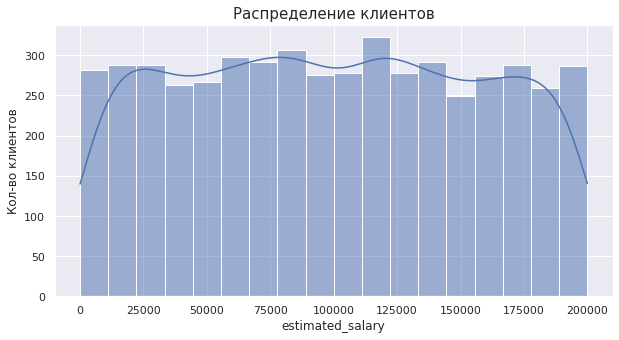

In [37]:
shapiro(client_1)

Проверим нормальность распределения клиентов с 2-мя продуктами:

p-value:  2.1702207154579243e-35
Отвергаем нулевую гипотезу: распределение ненормально


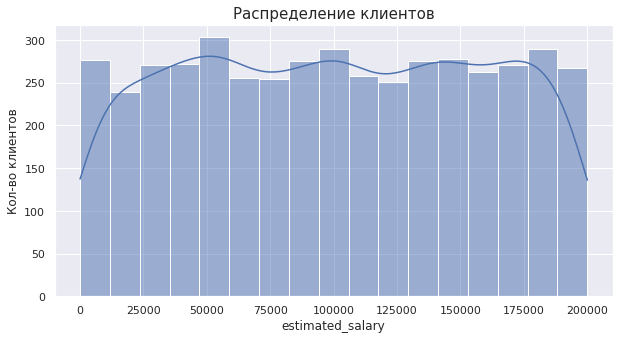

In [38]:
shapiro(client_2)

Распределение ненормально в обоих случаях. Значит для статистической проверки гипотез, нам нужно провести тест Манна-Уитни, что мы и сделаем:

In [39]:
def mann_whitneyu (data1, data2):
    alpha = 0.05  

    results = st.mannwhitneyu(data1, data2)

    print('p-value: ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: статистически значимое различие есть')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий нет') 

In [40]:
mann_whitneyu(client_1, client_2)

p-value:  0.4079566651927651
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий нет


Как мы видим, p-value значительно больше alpha. Соответственно, теория о том, что доходы клиентов, которые пользуются одним и двумя продуктами, различны - не подтвердилась. Можно сделать небольшую проверку, сравнив среднее по доходам клиентов:

In [41]:
display (f'Средняя зарплата клиента с 1-м продуктом: {client_1.mean().round(2)}',
         f'Средняя зарплата клиента с 2-мя продуктами: {client_2.mean().round(2)}')

'Средняя зарплата клиента с 1-м продуктом: 99487.26'

'Средняя зарплата клиента с 2-мя продуктами: 100452.01'

Как мы видим, разница минимальна.

### Проверка 2-й гипотезы

Далее проверим гипотезы различия дохода между клиентами молодого и среднего возраста:

- `Н0 - статистически значимых различий, между клиентами молодого и среднего возраста - нет`;
- `Н1 - статистически значимые различия, между клиентами молодого и среднего возраста - есть`.

Так же сформируем выборки из основного датасета:

In [42]:
# выборка клиентов молодого возраста
young_age = df[df.age_group == 'Молодые']['estimated_salary']

# выборка клиентов среднего возраста
midd_age = df[df.age_group == 'Среднего возраста']['estimated_salary']

In [43]:
display(f'Кол-во клиентов молодого возраста: {len(young_age)}',
        f'Кол-во клиентов среднего возраста: {len(midd_age)}')

'Кол-во клиентов молодого возраста: 4153'

'Кол-во клиентов среднего возраста: 5117'

Проверим данные на нормальность с помощью теста Шапира-Уилко:

- `Н0 - распределение нормально`
- `Н1 - распределение ненормально`

Проверим нормальность рапределения клиентов молодого возраста:

p-value:  1.790072758762801e-34
Отвергаем нулевую гипотезу: распределение ненормально


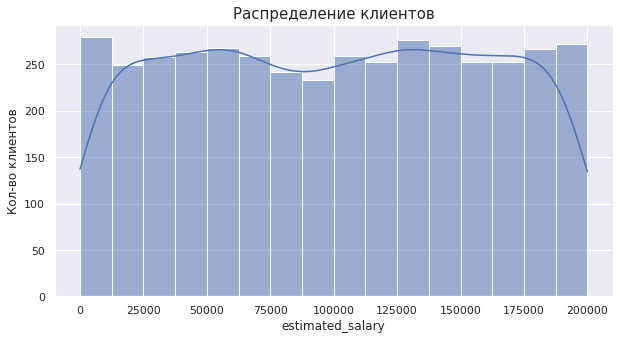

In [44]:
shapiro(young_age)

Проверим нормальность рапределения клиентов среднего возраста:

p-value:  1.3820285073716156e-35
Отвергаем нулевую гипотезу: распределение ненормально


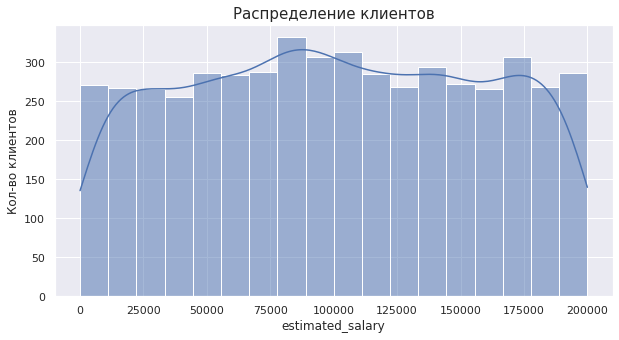

In [45]:
shapiro(midd_age)

Распределение ненормально в обоих случаях. Значит для статистической проверки гипотез, нам нужно провести так же тест Манна-Уитни.

In [46]:
mann_whitneyu (young_age, midd_age)

p-value:  0.6724478827649316
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий нет


Видим, что p-value больше alpha. Значит теория о том, что доходы клиентов молодого и среднего возраста отличаются, не подтвердилась.

In [47]:
display (f'Средняя зарплата клиента молодого возраста: {young_age.mean().round(2)}',
         f'Средняя зарплата клиента среднего возраста: {midd_age.mean().round(2)}')

'Средняя зарплата клиента молодого возраста: 100080.47'

'Средняя зарплата клиента среднего возраста: 100597.95'

Сделав проверку средних доходов, видим, что разницы практически нет.

## Выводы и рекомендации по удержанию сегментов

Проведя такой большой анализ, можно подвести конечные выводы:

- в отток попадают 20% всех клиентов. Чем старше клиент, тем более он склонен к уходу. Менее активные клиенты, что логично, так же склонны к уходу;
<br>

- среди женщин отток больше, чем среди мужчин (относительно одного пола). У мужчин, в среднем, выше баланс на счете, у женщин - выше оценочная зарплата (может означать оборот по карте, как пример). Это может говорить о том, что мужчины более склонны к накоплению, а женщины к тратам. Поэтому нужно создать условия обоим полам;
<br>

- клиенты, попадающие в отток, по всем сегментам, в среднем, более денежные и платежеспособные;
<br>

- большинство клиентов примерно до 37-38 лет пользуются двумя продуктами. После 38 лет, большинство клиентов пользуется 1-м продуктом. В общем, клиенты в большинстве случаев пользуются 1-2 продуктами. Очень редко 3-4. Очевидно, что продукты мало интересны клиентам и банком пользуются только в случае самых банальных потребностей.
<br>

- отток из группы клиентов, пользующихся 4-мя продуктами, составляет 100%. При том, большая вероятность, что эти клиенты более обеспечены и ищут банк, в котором хорошо развита система кредитования, инвестиций, защищены интересы клиента, возможно есть бизнес-направления, связанные с недвижимостью и подобными вещами. Не получая данного фундамента, они просто уходят.
<br>

- неактивных клиентов среднего возраста больше, чем активных. Именно среди этих клиентов самый большой отток относительно других возрастных категорий. Только эти клиенты попадают в группу пользования 4-мя продуктами. 
<br>

-  в банке больше всего клиентов среднего возраста, меньше всего - пенсионеров. Клиенты молодого возраста стабильнее вышеуказанных. Наверняка, банк молодой и больше удовлетворяет потребности контингента до 35 лет.
<br>

- если смотреть отток относительно каждой возрастной группы, то самый высокий процент оттока - у пенсионеров. Более молодые пенсионеры больше склонны к уходу, и чем выше вероятность ухода, тем активность максимально слабая или отсутствует. Если такое происходит, наверняка, очень мало условий для людей, готовящихся и уже вышедших на пенсию. Условия банка явно не лучше, чем у других.

### Рекомендации по уменьшению оттока

На основании данных выводов, можно дать рекомендации менеджеру банка. Вцелом, на сегодняшний день, чтобы быть действительно основательным банком, даже брендом, мало просто иметь возможность открывать карты, счета и всё то, чем занимается любой другой банк. 
<br>
Чтобы стать востребовонной фигурой на рынке, нужно стремиться к созданию своей экосистемы. Применяя данный оборот к нашей ситуации, что можно было бы сделать:

1. Проанализировав денежные обороты мужского и женского пола в банке, мы предположили, что мужчины более склонны к накоплению капитала и работе финансовых потоков, а женщины более склонны к тратам. Чтобы женский пол больше оставался с банком, есть смысл наладить сотрудничество с магазинами, где преобладают продукция и услуги для женщин. Приобретая их через, например, мобильное приложения банка, у клиентов могут копиться какие-то бонусные баллы, быть индивидуальные скидки. Должны быть индивидуальные товары с покупкой в рассрочку только лишь через наш банк. Это придаст банку некую эксклюзивность и закроет потребности многих клиентов, не только женского пола. 
<br>

2. Рекомендация касается как обоих полов, так и клиентов, которые находятся в группе с 4-мя продуктами в пользовании, и которые 100% попадают в отток. Теряя клиентов из 4 группы с продуктами, мы теряем, вероятно, клиентов обеспеченных, как мы писали ранее. Банк не предлагает основательного фундамента для таких клиентов. Обеспеченные клиенты могут проводить операции связанные с недвижимостью, её страхованием, выгодным кредитованием, дальнейшим инвестированием средств в финансовый рынок и другие инструменты. Эти системы пользования должны быть максимально удобны и взаимосвязаны. Сотрудничать с застройщиками, продавцами (не)коммерческого жилья по специальным условиям для клиентов, тут же страхование этой недвижимости. Развитие системы инвестирования в финансовый рынок (моб. приложение, открытие индивидуальных счетов, премиальный статус при определенной сумме вложений и т.д.). Создать систему взаимодействия для деловых людей.
<br>

3. Для пенсионеров, будущих и сегодняшних, должны быть созданы максимальные условия заботы. Пенсионные карты с льготами, повышенные проценты по вкладам, специальные предложения для пенсионеров с вложениями в облигации и подобные вещи. Банк должен выделять пенсионеров как отдельную категорию и создавать им специальные условия, чтобы пенсионеры оставались и шли в наш банк, видели его заботу и участие.

Подведя итог, можно сказать, что анализируемый банк не заинтересовывает некоторые сегменты клиентов тем, что он имеет. Либо этого в банке нет вообще, либо сделано максимально некачественно, что провоцирует такой отток, что мы и должны сказать менеджеру банка.
<br>

В общем, создание экосистемы подразумевает то, что клиенту не нужно идти в другое место, чтобы сделать то, что он может сделать здесь. И делать это нужно максимально качественно, а не для галочки. Именно такой подход показывает, что банк состоятельный, независимый и ему можно доверять.

## Материалы

https://disk.yandex.ru/i/grDvd5SkIghLlw - презентация
<br>
https://public.tableau.com/app/profile/.29582607/viz/final_project_dash_16696350561300/sheet2?publish=yes - дашборд